# DATA SCIENCE 

# Analytical Report

# NLP With Hotel Review Part 2

# Modeling

### Written by Nataliya Parshyna

### Date: March 12, 2021


## Introduction

   This report is the second part of the NLP With Hotel Review series of reports. In the previous report, the first part of the
series, we analyzed the data set called Hotel_Reviews. We did an exploratory analysis of the data and data wrangling including features engineering. Also, we provided multiple visuals to help the audience to understand data better.

   Hotel_Reviews is a data table containing multiple observations and features for different hotels with reviews provided from multiple reviewers. The hotels being reviewed are all located in Europe, and reviews included positive and negative reviews. The reviews were scored, and our target parameter was a Reviewer_Score feature which we try to predict with maximum accuracy.
We did not build any predicting models in the last report, just prepared the data for modeling. To put data into a modeling algorithm, we converted all non-numerical features into numerical, and now our data is ready for the model.

   In this report, we are provided with a "clean" set of data. It is the same source data, Hotel_Reviews, but is cleaned and prepared for us to work with.  All columns ie. features are converted to numerical data type, and there are no NaN values in the rows.
   
   The target column is the "rating" column which is a binary column denoting good ratings and bad ones as 0.
   
   A column in a data set is called a target when we try to predict values in this column. So, in our case, we will try to predict review ratings based on other features in the data set.
   
   In this report, we will apply different classification models to our data set to find out which predictive model gives us the best result in predicting review ratings, and the best model will be a model with the highest accuracy score. We will try a logistic regression classification model,  a K-Nearest Neighbour classification model, and a Decision Tree classifier.
   
   We will apply different techniques to optimize our models. We will explore how a principal component analysis works, and how the reduction in dimensionalities affects a model run-time. We will apply the Natural language processing (NLP) algorithm to extract the most usable words in positive and negative reviews. We also will explore the advantages and disadvantages of different predictive models, particularly we will take a look at a KNN algorithm versus a decision tree classifier and compare them one to another. We will show how a validation set is important to improve the model accuracy. and how a validation set is different from a test set. We will perform a 5_fold cross-validation to optimize the hyperparameters of our model and see how the accuracy will improve if any. Finally, we will add a feature to our model. This added feature (a column) will be combined information from another two columns. We will see if the model accuracy will change if at all with this newly added feature.
  

## 1. Employ a linear classifier on this dataset:

###  1.1 Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

In [1]:
# Importing pachages we will need for this report

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

We will load the clean data by using pd.read function. There are 2 data files: 'clean_train_dataframe' and 'clean_test_dataframe'. These sets are already separated as train and test data, so we do not have to split the data again when assigning our variables to run models. 

In [2]:
# load data - 'clean_train_dataframe' and 'clean_test_dataframe'

df_test=pd.read_csv("clean_test_dataframe.csv",encoding='latin-1')

df_train=pd.read_csv("clean_train_dataframe.csv",encoding='latin-1')

In [3]:
#checking df_train
df_train

Additional_Number_of_Scoring  Average_Score  \
0                               620            9.0   
1                              1258            9.4   
2                               995            8.1   
3                               853            8.4   
4                              1243            8.1   
...                             ...            ...   
12793                            68            7.8   
12794                          1172            7.8   
12795                           562            8.5   
12796                           154            8.0   
12797                           390            7.8   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     1974   
1                                      6                     4204   
2                                      2                     3826   
3                                      7                     2726   
4                                     11                     6608   
...                                  ...                      ...   
12793                                  2                      264   
12794                                 10                     5945   
12795                                  0                     1944   
12796                                 13                      768   
12797                                  7                     1717   

       Review_Total_Positive_Word_Counts  \
0                                    164   
1                                      4   
2                                     38   
3                                     10   
4                                      8   
...                                  ...   
12793                                 20   
12794                                  8   
12795                                 26   
12796                                  6   
12797                                  9   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                               1                562   
1                                               5                276   
2                                               1                129   
3                                              10                164   
4                                              69                639   
...                                           ...                ...   
12793                                           2                185   
12794                                          16                627   
12795                                           5                702   
12796                                           2                 24   
12797                                           2                526   

             lat       lng  weekday_of_review  ...  n_worry  n_worth  n_would  \
0      51.506558 -0.004514                  1  ...        0        0        0   
1      51.502435 -0.000250                  0  ...        0        0        0   
2      51.504348 -0.033444                  0  ...        0        0        0   
3      51.507377  0.038657                  0  ...        0        0        0   
4      51.513556 -0.180002                  1  ...        0        0        0   
...          ...       ...                ...  ...      ...      ...      ...   
12793  51.522087 -0.108244                  0  ...        0        0        0   
12794  51.499981 -0.192879                  6  ...        0        0        0   
12795  51.492418 -0.278470                  1  ...        0        0        0   
12796  51.512676 -0.186783                  0  ...        0        0        0   
12797  51.492627 -0.228860                  2  ...        0        0        0   

       n_write  n_wrong  n_year  n_yes  n_yet  n_young  rating  
0            0        0       0      0      0        0       1  
1            0        0       0 

In [4]:
#checking df_test
df_test

Additional_Number_of_Scoring  Average_Score  \
0                             1005            8.3   
1                              487            8.8   
2                              570            9.3   
3                             2623            8.7   
4                              365            8.1   
...                            ...            ...   
4262                           335            8.5   
4263                           406            8.2   
4264                           581            8.4   
4265                           620            9.0   
4266                           744            8.3   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     0                     3469   
1                                    46                     1805   
2                                     0                     2319   
3                                    19                    12158   
4                                    13                     1567   
...                                 ...                      ...   
4262                                  0                      944   
4263                                 72                     2011   
4264                                 16                     1994   
4265                                 58                     1974   
4266                                  7                     2474   

      Review_Total_Positive_Word_Counts  \
0                                     6   
1                                   121   
2                                     9   
3                                     0   
4                                     0   
...                                 ...   
4262                                  7   
4263                                  0   
4264                                 12   
4265                                 24   
4266                                  8   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              2                297   
1                                              1                  4   
2                                              1                590   
3                                              2                269   
4                                              2                373   
...                                          ...                ...   
4262                                           1                269   
4263                                           9                324   
4264                                           1                496   
4265                                          11                131   
4266                                           2                548   

            lat       lng  weekday_of_review  ...  n_n_worry  n_n_worth  \
0     51.559096 -0.284704                  0  ...          0          0   
1     51.474469 -0.019428                  6  ...          0          0   
2     51.505696 -0.101525                  1  ...          0          0   
3     51.500961 -0.116591                  0  ...          0          0   
4     51.515125 -0.160066                  1  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
4262  51.540394 -0.369758                  0  ...          0          0   
4263  51.517972 -0.128049                  1  ...          0          0   
4264  51.507894 -0.143671                  4  ...          0          0   
4265  51.506558 -0.004514                  5  ...          0          0   
4266  51.529142 -0.137278                  1  ...          0          0   

      n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  n_n_young  \
0             0          0          0         0        0        0          0   
1             0          0          0         0        0        0          0   
2             0          0          0    

  We can see that both data sets contain $2,744$ features (columns), and the target is the very last column in both data sets - the column "rating". The train data has $12,798$ observations (rows), and the test data has $4,267$ observations (rows). The full data set then has $12,798+2,744=17,065$ observations (rows) or $ 100$%.
  The train set is $75$% of the whole data ($12,798*100/17,065$), and a test set is $25$% of the data ($4,267*100/17,065$). 
We have a $75/25$% split of data.  We won't check these data sets for NaN numbers, duplicates, and data types as these sets are supposedly clean and ready to be modeled. All data in both data sets is supposedly numerical.

 Logistic Regression.

  We will fit a logistic regression model to this data with the solver set to lbfgs. Then we will find the accuracy score on the test set.
   
   We will first separate X and y variables where y is a target variable. Then we will scale the data (both a train and a set)  by applying 2 different scales - MinMax scaler and Standard Scaler to chose a scaler which will give us the best test accuracy score.
   
   Then we will look for different c parameters in the logistic regression model. We will plot test and train accuracies for different C values and find the optimal c-value whic is c providing the best test accuracy score.
   
   We will try to find the best c value with the best scaler so the accuracy score of the test set is maximum.
   
   We are asked to use a  'lbfgs' solver. This solver is a default solver in sklearn.linear_model.LogisticRegression, and we do not have to specify it in the model. This solver handles only l2 or no penalties (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
   
   Under either penalty conditions, the smaller the C, the greater the learning rate  𝛼  and the greater the penalization where the hope with this penalization is to help reduce overfitting of the Logistic Regression to the training data.

  By trying out different C values and checking the model's accuracy scores we will try to find the best parameters where we have a moderate penalty.

We will assign X and y values to both data sets - df_train and df_test data sets. To assign X and y values, for X values we will drop a feature 'rating', and for y value, we will keep only a feature 'rating' which is our target. We will do these steps for both data sets.

In [5]:
# Assigning our features to X 
X_train = df_train.drop(['rating'], axis=1)

# Assigning our target to y 
y_train = df_train['rating']

# Check 
display(X_train)
print(y_train)

Additional_Number_of_Scoring  Average_Score  \
0                               620            9.0   
1                              1258            9.4   
2                               995            8.1   
3                               853            8.4   
4                              1243            8.1   
...                             ...            ...   
12793                            68            7.8   
12794                          1172            7.8   
12795                           562            8.5   
12796                           154            8.0   
12797                           390            7.8   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     1974   
1                                      6                     4204   
2                                      2                     3826   
3                                      7                     2726   
4                                     11                     6608   
...                                  ...                      ...   
12793                                  2                      264   
12794                                 10                     5945   
12795                                  0                     1944   
12796                                 13                      768   
12797                                  7                     1717   

       Review_Total_Positive_Word_Counts  \
0                                    164   
1                                      4   
2                                     38   
3                                     10   
4                                      8   
...                                  ...   
12793                                 20   
12794                                  8   
12795                                 26   
12796                                  6   
12797                                  9   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                               1                562   
1                                               5                276   
2                                               1                129   
3                                              10                164   
4                                              69                639   
...                                           ...                ...   
12793                                           2                185   
12794                                          16                627   
12795                                           5                702   
12796                                           2                 24   
12797                                           2                526   

             lat       lng  weekday_of_review  ...  n_world  n_worry  n_worth  \
0      51.506558 -0.004514                  1  ...        0        0        0   
1      51.502435 -0.000250                  0  ...        0        0        0   
2      51.504348 -0.033444                  0  ...        0        0        0   
3      51.507377  0.038657                  0  ...        0        0        0   
4      51.513556 -0.180002                  1  ...        0        0        0   
...          ...       ...                ...  ...      ...      ...      ...   
12793  51.522087 -0.108244                  0  ...        0        0        0   
12794  51.499981 -0.192879                  6  ...        0        0        0   
12795  51.492418 -0.278470                  1  ...        0        0        0   
12796  51.512676 -0.186783                  0  ...        0        0        0   
12797  51.492627 -0.228860                  2  ...        0        0        0   

       n_would  n_write  n_wrong  n_year  n_yes  n_yet  n_young  
0            0        0        0       0      0      0        0  
1            0        0       

0        1
1        1
2        1
3        0
4        0
        ..
12793    0
12794    0
12795    1
12796    0
12797    1
Name: rating, Length: 12798, dtype: int64


In [6]:
# Assigning our features to X 
X_test = df_test.drop(['rating'], axis=1)

# Assigning our target to y 
y_test = df_test['rating']

# Check 
display(X_test)
print(y_test)

Additional_Number_of_Scoring  Average_Score  \
0                             1005            8.3   
1                              487            8.8   
2                              570            9.3   
3                             2623            8.7   
4                              365            8.1   
...                            ...            ...   
4262                           335            8.5   
4263                           406            8.2   
4264                           581            8.4   
4265                           620            9.0   
4266                           744            8.3   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     0                     3469   
1                                    46                     1805   
2                                     0                     2319   
3                                    19                    12158   
4                                    13                     1567   
...                                 ...                      ...   
4262                                  0                      944   
4263                                 72                     2011   
4264                                 16                     1994   
4265                                 58                     1974   
4266                                  7                     2474   

      Review_Total_Positive_Word_Counts  \
0                                     6   
1                                   121   
2                                     9   
3                                     0   
4                                     0   
...                                 ...   
4262                                  7   
4263                                  0   
4264                                 12   
4265                                 24   
4266                                  8   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              2                297   
1                                              1                  4   
2                                              1                590   
3                                              2                269   
4                                              2                373   
...                                          ...                ...   
4262                                           1                269   
4263                                           9                324   
4264                                           1                496   
4265                                          11                131   
4266                                           2                548   

            lat       lng  weekday_of_review  ...  n_n_world  n_n_worry  \
0     51.559096 -0.284704                  0  ...          0          0   
1     51.474469 -0.019428                  6  ...          0          0   
2     51.505696 -0.101525                  1  ...          0          0   
3     51.500961 -0.116591                  0  ...          0          0   
4     51.515125 -0.160066                  1  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
4262  51.540394 -0.369758                  0  ...          0          0   
4263  51.517972 -0.128049                  1  ...          0          0   
4264  51.507894 -0.143671                  4  ...          0          0   
4265  51.506558 -0.004514                  5  ...          0          0   
4266  51.529142 -0.137278                  1  ...          0          0   

      n_n_worth  n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  \
0             0          0          0          0         0        0        0   
1             0          0          0          0         0        0        0   
2             0          0          0    

0       0
1       1
2       1
3       0
4       0
       ..
4262    1
4263    0
4264    1
4265    0
4266    1
Name: rating, Length: 4267, dtype: int64


 MinMaxScaler

We will scale the data using MinMax scaler now. We will scale only X variables as we never scale our target. We will scale both test and train X variables. We will fit a scaler on our X-train, and then we will transform X-train and X-test. We will call our new variables X_train_mm and X_test_mm respectively.

In [7]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler
MM.fit(X_train)

# Transform the training and test sets 
X_train_mm = MM.transform(X_train)
X_test_mm = MM.transform(X_test)

Next, we will run a logistic regression model using our MinMaxed scaled variables. We will run models with different cs ( c is a hyperparameter for logistic regression). C values will be $0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000$. Then we will print our train and test accuracies scores and plot a graph called 'Test and Train Accuracies for Different C values'. From that graph, we will choose a c value where a test accuracy score is the highest. Finally, we will run the logistic regression model again with the best c as a parameter.

In [8]:
# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Empty lists to append train and test accuracy scores to 
train_acc_mm = []
test_acc_mm = []

# Loop through the different C values
for C in C_values:

    # Instantiate the model, increase max_iter to 1000 
    logreg = LogisticRegression(C=C, max_iter=1000)

    # Fit the model 
    logreg.fit(X_train_mm, y_train)

    # Score the model 
    train_acc_mm.append(logreg.score(X_train_mm, y_train))
    test_acc_mm.append(logreg.score(X_test_mm, y_test))

In [9]:
train_acc_mm 

[0.5761056415064854,
 0.5761056415064854,
 0.6892483200500078,
 0.7748867010470386,
 0.8155180496952649,
 0.8542741053289576,
 0.8781059540553211,
 0.8856852633223942,
 0.8856852633223942,
 0.8857634005313331]

In [10]:
test_acc_mm

[0.5760487461917038,
 0.5760487461917038,
 0.6929927349425826,
 0.7729083665338645,
 0.7876728380595266,
 0.7792359971877197,
 0.7581438950082025,
 0.7393953597375205,
 0.7335364424654324,
 0.7333020857745489]

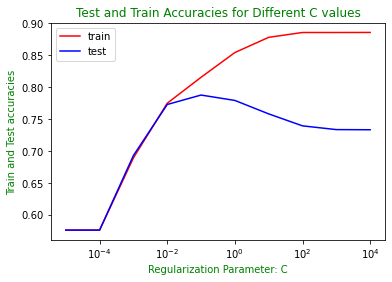

In [11]:
plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xscale('log')
plt.legend()
plt.xlabel('Regularization Parameter: C', color='g')
plt.ylabel('Train and Test accuracies', color='g')
plt.title('Test and Train Accuracies for Different C values',color='g' )
plt.show()

Based on the graph above, we could decide that the "best"  C is  0.1 (10-1), as the accuracy is the highest. We could also pick 0.01 (10-2) as the train and test accuracy scores were closest while still being high.

There's also justification to select C = 0.01 (10-2) if we wanted to be more strict with the penalization.

Next, we will train a model with c=0.1 and check the test accuracy score.


In [12]:
 # Instantiate the model, increase max_iter to 1000 
logreg = LogisticRegression(C=0.1, max_iter=1000)

    # Fit the model 
logreg.fit(X_train_mm, y_train)

logreg.score(X_test_mm, y_test)

0.7876728380595266

Accuracy score of a test set for a MinMax scaled data with logistic regression is 0.79 or 79% accuracy.

Next, we will perform steps we have done with a MinMax scaler, but this time we will apply a Standard Scaler and see if we get any differences in test accuracies scores.

StandardScaler

We will fit a scaler on the train set, and transform a train and a set tests.




In [13]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler
SS.fit(X_train)

# Transform the training and test sets 
X_train_ss = SS.transform(X_train)
X_test_ss = SS.transform(X_test)

In [14]:
# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [15]:
# Empty lists to append the training and test accuracy scores to  
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values 
for C in C_values:

    # Instantiate the model 
    log_reg=LogisticRegression(C=C, solver='lbfgs', max_iter=1000)

    # Fit the model 
    log_reg.fit(X_train_ss, y_train)

    # Score the model 
    train_acc_ss.append(log_reg.score(X_train_ss, y_train))
    test_acc_ss.append(log_reg.score(X_test_ss, y_test))

In [16]:
train_acc_ss 

[0.6676824503828723,
 0.8059853102047195,
 0.8537271448663853,
 0.8791998749804657,
 0.8845132051883107,
 0.885841537740272,
 0.8852164400687608,
 0.8852945772776997,
 0.8852164400687608,
 0.8852945772776997]

In [17]:
test_acc_ss

[0.6622920084368409,
 0.7811108507147879,
 0.777595500351535,
 0.7543941879540661,
 0.7379892195922193,
 0.7328333723927818,
 0.7328333723927818,
 0.7321303023201312,
 0.7321303023201312,
 0.7321303023201312]

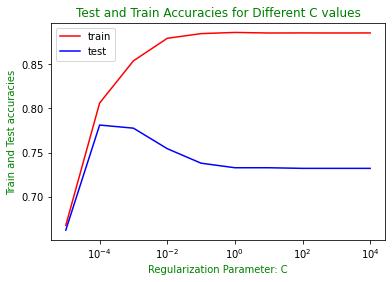

In [18]:
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')
plt.legend()
plt.xlabel('Regularization Parameter: C', color='g')
plt.ylabel('Train and Test accuracies', color='g')
plt.title('Test and Train Accuracies for Different C values',color='g' )
plt.show()


Based on the above, we could decide that the "best" model was the Logistic Regression with a C of c = 0.0001 (10-4), as the train and test accuracy scores were closest while still being high.


In [19]:
 # Instantiate the model, increase max_iter to 1000 
logreg = LogisticRegression(C=0.0001, max_iter=1000)

    # Fit the model 
logreg.fit(X_train_ss, y_train)

logreg.score(X_test_ss, y_test)

0.7811108507147879

Accuracy score of a test set for a Standard scaled data with logistic regression is 0.78 or 78% accuracy.

1. Accuracy score of a test set for a MinMax scaled data with logistic regression is 0.79 or 79% accuracy.
2. Accuracy score of a test set for a Standard scaled data with logistic regression is 0.78 or 78% accuracy.

We know that **the smaller the `C`, the greater the learning rate $\alpha$ and the greater the penalization**, and we know that we use penalization to reduce the overfitting of the model.

In our case, I decide to go with Standard Scaler where the accuracy score is 0.78 or 78%. as c is lesser than with MinMax scaler, and the accuracy score is about the same. A lesser C value allows for more penalization and as a result, less overfitting of our model. Note: we did not apply PCA method for this model.

### 1.2 What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question

In [20]:
# import CountVectorizer to work with text data
from sklearn.feature_extraction.text import CountVectorizer

We have assigned our X and y variables earlies, and now we will just check them again.
We will assign X and y values to both data sets - df_train and df_test data sets. To assign X and y values, for X values we will drop a feature 'rating', and for y value, we will keep only a feature 'rating' which is our target. We will do these steps for both data sets.

In [21]:
# Assigning our features to X. Using train and test data sets.
X_train = df_train.drop(['rating'], axis=1)

# Assigning our target to y 
y_train = df_train['rating']

# Check 
display(X_train)
print(y_train)

Additional_Number_of_Scoring  Average_Score  \
0                               620            9.0   
1                              1258            9.4   
2                               995            8.1   
3                               853            8.4   
4                              1243            8.1   
...                             ...            ...   
12793                            68            7.8   
12794                          1172            7.8   
12795                           562            8.5   
12796                           154            8.0   
12797                           390            7.8   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     1974   
1                                      6                     4204   
2                                      2                     3826   
3                                      7                     2726   
4                                     11                     6608   
...                                  ...                      ...   
12793                                  2                      264   
12794                                 10                     5945   
12795                                  0                     1944   
12796                                 13                      768   
12797                                  7                     1717   

       Review_Total_Positive_Word_Counts  \
0                                    164   
1                                      4   
2                                     38   
3                                     10   
4                                      8   
...                                  ...   
12793                                 20   
12794                                  8   
12795                                 26   
12796                                  6   
12797                                  9   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                               1                562   
1                                               5                276   
2                                               1                129   
3                                              10                164   
4                                              69                639   
...                                           ...                ...   
12793                                           2                185   
12794                                          16                627   
12795                                           5                702   
12796                                           2                 24   
12797                                           2                526   

             lat       lng  weekday_of_review  ...  n_world  n_worry  n_worth  \
0      51.506558 -0.004514                  1  ...        0        0        0   
1      51.502435 -0.000250                  0  ...        0        0        0   
2      51.504348 -0.033444                  0  ...        0        0        0   
3      51.507377  0.038657                  0  ...        0        0        0   
4      51.513556 -0.180002                  1  ...        0        0        0   
...          ...       ...                ...  ...      ...      ...      ...   
12793  51.522087 -0.108244                  0  ...        0        0        0   
12794  51.499981 -0.192879                  6  ...        0        0        0   
12795  51.492418 -0.278470                  1  ...        0        0        0   
12796  51.512676 -0.186783                  0  ...        0        0        0   
12797  51.492627 -0.228860                  2  ...        0        0        0   

       n_would  n_write  n_wrong  n_year  n_yes  n_yet  n_young  
0            0        0        0       0      0      0        0  
1            0        0       

0        1
1        1
2        1
3        0
4        0
        ..
12793    0
12794    0
12795    1
12796    0
12797    1
Name: rating, Length: 12798, dtype: int64


Now we will extract only features that are of the negative reviews. To do this, we will find all the columns starting with "n" and use only these columns for the modeling as only these columns are encoded from the original data as negative reviews.

In [22]:
x_train_negative = X_train.loc[:, X_train.columns.str.startswith('n_')]
x_train_negative.shape

(12798, 1343)

Next,  we will extract only features that are of the positive reviews. To do this, we will find all the columns starting with "p" and use only these columns for the modeling as only these columns are encoded from the original data as positive reviews.

In [23]:
x_train_positive = X_train.loc[:, X_train.columns.str.startswith('p_')]
x_train_positive.shape

(12798, 983)

Finally, we will concatenate positive and negative review features to get x_train data set containing columns with reviews.

In [24]:
x_train = pd.concat([x_train_negative, x_train_positive], axis=1)
x_train.shape

(12798, 2326)

In [31]:
# checking x_train data frame
x_train

n_  n_00  n_02  n_1  n_10  n_100  n_11  n_11am  n_11pm  n_12  ...  \
0       0     0     0    0     0      0     0       0       0     0  ...   
1       1     0     0    0     0      0     0       0       0     0  ...   
2       1     0     0    0     0      0     0       0       0     0  ...   
3       1     0     0    0     0      0     0       0       0     0  ...   
4       2     0     0    0     0      0     0       0       0     0  ...   
...    ..   ...   ...  ...   ...    ...   ...     ...     ...   ...  ...   
12793   1     0     0    0     0      0     0       0       0     0  ...   
12794   2     0     0    0     0      0     0       0       0     0  ...   
12795   0     0     0    0     0      0     0       0       0     0  ...   
12796   2     0     0    0     0      0     0       0       0     0  ...   
12797   1     0     0    0     0      0     0       0       0     0  ...   

       p_worth  p_would  p_wow  p_x  p_yard  p_year  p_yes  p_yet  p_young  \
0            0        1      0    0       0       0      0      0        0   
1            0        0      0    0       0       0      0      0        0   
2            0        0      0    0       0       0      0      0        0   
3            0        0      0    0       0       0      0      0        0   
4            0        0      0    0       0       0      0      0        0   
...        ...      ...    ...  ...     ...     ...    ...    ...      ...   
12793        0        0      0    0       0       0      0      0        0   
12794        0        0      0    0       0       0      0      0        0   
12795        0        0      0    0       0       0      0      0        0   
12796        0        0      0    0       0       0      0      0        0   
12797        0        0      0    0       0       0      0      0        0   

       p_yummy  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
12793        0  
12794        0  
12795        0  
12796        0  
12797        0  

[12798 rows x 2326 columns]

We will the same process for the test data set: assigning features to x and y, finding positive and negative columns, and concatenating them into x_test data frame.

In [26]:
# Assigning our features to X 
x_test_negative = df_test.drop(['rating'], axis=1)

# Assigning our target to y 
y_test = df_test['rating']

# Check 
display(X_test)
print(y_test)

Additional_Number_of_Scoring  Average_Score  \
0                             1005            8.3   
1                              487            8.8   
2                              570            9.3   
3                             2623            8.7   
4                              365            8.1   
...                            ...            ...   
4262                           335            8.5   
4263                           406            8.2   
4264                           581            8.4   
4265                           620            9.0   
4266                           744            8.3   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     0                     3469   
1                                    46                     1805   
2                                     0                     2319   
3                                    19                    12158   
4                                    13                     1567   
...                                 ...                      ...   
4262                                  0                      944   
4263                                 72                     2011   
4264                                 16                     1994   
4265                                 58                     1974   
4266                                  7                     2474   

      Review_Total_Positive_Word_Counts  \
0                                     6   
1                                   121   
2                                     9   
3                                     0   
4                                     0   
...                                 ...   
4262                                  7   
4263                                  0   
4264                                 12   
4265                                 24   
4266                                  8   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              2                297   
1                                              1                  4   
2                                              1                590   
3                                              2                269   
4                                              2                373   
...                                          ...                ...   
4262                                           1                269   
4263                                           9                324   
4264                                           1                496   
4265                                          11                131   
4266                                           2                548   

            lat       lng  weekday_of_review  ...  n_n_world  n_n_worry  \
0     51.559096 -0.284704                  0  ...          0          0   
1     51.474469 -0.019428                  6  ...          0          0   
2     51.505696 -0.101525                  1  ...          0          0   
3     51.500961 -0.116591                  0  ...          0          0   
4     51.515125 -0.160066                  1  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
4262  51.540394 -0.369758                  0  ...          0          0   
4263  51.517972 -0.128049                  1  ...          0          0   
4264  51.507894 -0.143671                  4  ...          0          0   
4265  51.506558 -0.004514                  5  ...          0          0   
4266  51.529142 -0.137278                  1  ...          0          0   

      n_n_worth  n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  \
0             0          0          0          0         0        0        0   
1             0          0          0          0         0        0        0   
2             0          0          0    

0       0
1       1
2       1
3       0
4       0
       ..
4262    1
4263    0
4264    1
4265    0
4266    1
Name: rating, Length: 4267, dtype: int64


In [27]:
x_test_negative = X_test.loc[:, X_test.columns.str.startswith('n_')]
x_test_negative.shape

(4267, 1343)

In [28]:
x_test_positive = X_test.loc[:, X_test.columns.str.startswith('p_')]
x_test_positive.shape

(4267, 983)

In [29]:
x_test = pd.concat([x_test_negative, x_test_positive], axis=1)
x_test.shape

(4267, 2326)

In [32]:
x_test

n_n_  n_n_00  n_n_02  n_n_1  n_n_10  n_n_100  n_n_11  n_n_11am  \
0        0       0       0      0       0        0       0         0   
1        2       0       0      0       0        0       0         0   
2        0       0       0      0       0        0       0         0   
3        1       0       0      0       0        0       0         0   
4        1       0       0      0       0        0       0         0   
...    ...     ...     ...    ...     ...      ...     ...       ...   
4262     0       0       0      0       0        0       0         0   
4263     2       0       0      0       0        0       0         0   
4264     2       0       0      0       0        0       0         0   
4265     2       0       0      0       0        0       0         0   
4266     2       0       0      0       0        0       0         0   

      n_n_11pm  n_n_12  ...  p_worth  p_would  p_wow  p_x  p_yard  p_year  \
0            0       0  ...        0        0      0    0       0       0   
1            0       0  ...        0        1      0    0       0       0   
2            0       0  ...        0        0      0    0       0       0   
3            0       0  ...        0        0      0    0       0       0   
4            0       0  ...        0        0      0    0       0       0   
...        ...     ...  ...      ...      ...    ...  ...     ...     ...   
4262         0       0  ...        0        0      0    0       0       0   
4263         0       0  ...        0        0      0    0       0       0   
4264         0       0  ...        0        0      0    0       0       0   
4265         0       0  ...        0        0      0    0       0       0   
4266         0       0  ...        0        0      0    0       0       0   

      p_yes  p_yet  p_young  p_yummy  
0         0      0        0        0  
1         0      0        0        0  
2         0      0        0        0  
3         0      0        0        0  
4         0      0        0        0  
...     ...    ...      ...      ...  
4262      0      0        0        0  
4263      0      0        0        0  
4264      0      0        0        0  
4265      0      0        0        0  
4266      0      0        0        0  

[4267 rows x 2326 columns]

We will use the Bag of Words method to extract words from the reviews. Bag of words is a Natural Language Processing (NLP) technique of text modeling. NLP  is a method of feature extraction with text data.  
 (https://www.mygreatlearning.com/blog/bag-of-words/)

  Our goal is to remove very frequent words that do not bring extra information and do not help to understand text data better. We will try to remove articles, prepositions, pronouns, conjunctions, and simple verbs like 'be' and 'have'. These words are called**stop words**. we will usea seting stop_words="english"

  We will now use the `CountVectorizer()` function, and add in an argument that takes away common stop words. 

In [37]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(x_train)

x_train_transformed = bagofwords.transform(x_train) 
x_test_transformed = bagofwords.transform(x_test) 

x_train_transformed.shape

(2326, 2326)

In [38]:
# chek the shape of the X_test_transformed
x_test_transformed.shape

(2326, 2326)

Next, we will Logistic Regression. In order for the model to run successfully, we need to have the same number of observations in our x and y sets. Observations in x sets are now 2,326. We will reduce the number of observations in y sets to align y sets observations with the x sets. We will use a random sample function to keep 2326 observations.

In [39]:
y_train_red = y_train.sample(2326)

In [40]:
y_test_red = y_test.sample(2326)

Fitting a classifier


 We will use a Logistic Regression model as a classifier to predict if a review is positive or negative.

In [41]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(x_train_transformed, y_train_red)

# Training and test score
print(f"Train score: {logreg.score(x_train_transformed, y_train_red)}")
print(f"Test score: {logreg.score(x_test_transformed, y_test_red)}")

Train score: 0.5825451418744626
Test score: 0.5739466895958727


We see that our model doesn't perform well. Even by random guessing, we could have predicted with 50 % accuracy, and our model is doing only 57% accuracy.


Let's look at the coefficients of our model and plot them at the same time. We will find first 20 coeeficients. These are the highest coeeficients, andwe  called them 'Positive indicatores"coefficients'. On the other hand, the last 20 coefficients are the lowest ones, and we will call them 'Negative indicators'.

In [42]:
words = bagofwords.get_feature_names()

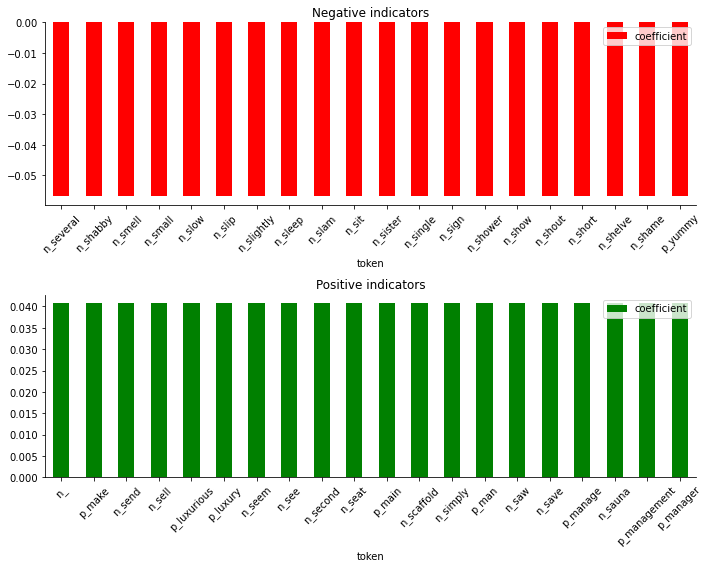

In [43]:
def plot_coefs(logreg, words):
    coef_df = pd.DataFrame({'coefficient': logreg.coef_[0], 'token': words})
    coef_df = coef_df.sort_values('coefficient', ascending=False)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # smallest coefficient -> tokens indicating negative sentiment 
    coef_df.tail(20).set_index('token').plot(kind='bar', rot=45, ax=axs[0], color='red')
    axs[0].set_title('Negative indicators')
 
    
    # largest coefficient -> tokens indicating positive sentiment 
    coef_df.head(20).set_index('token').plot(kind='bar', rot=45, ax=axs[1], color='green')
    axs[1].set_title('Positive indicators')
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_coefs(logreg, words)

The results are not very easy to interpret as all wards start with n or p. However, we still can extract information (words) from the coefficients. We can see that "smell", "slow", "shout" are indicators of negative reviews, and "luxutious", "save", "manage" are indicators of positive reviews.

20 most predictive words of a good review:
make, send, sell, luxurious, luxury, seem, see, second, seat, main, scaffold, simply, man, saw, save, manage, sauna, management, manager.


20 most predictive words of a negative review:
several, shabby, smell, small, slow, slip, slightly, sleep, slam, sit, sister, single, sign, shower, show, shout, short, shelve, shame, yummy.

We will go ahead and try other models to see if we can get better test accuracy scores. We will fit KNN, Decision Tree, SVC, and Logistis regression.

In [44]:
# Instantiate models
all_models = {
    "logreg": LogisticRegression(C=0.1),
    "knn": KNeighborsClassifier(), 
    "dt": DecisionTreeClassifier(max_depth=10), 
    "svc": SVC(kernel='rbf')
}

train_scores = {}
test_scores = {}

# Fit models
for name, model in all_models.items():
    model.fit(x_train_transformed, y_train_red)
    train_scores[name] = model.score(x_train_transformed, y_train_red)
    test_scores[name] = model.score(x_test_transformed, y_test_red)

In [45]:
train_scores

{'logreg': 0.5825451418744626,
 'knn': 0.617798796216681,
 'dt': 0.5868443680137575,
 'svc': 1.0}

In [46]:
test_scores

{'logreg': 0.5739466895958727,
 'knn': 0.5722269991401547,
 'dt': 0.5726569217540842,
 'svc': 0.5554600171969045}

In [47]:
scores_df = pd.DataFrame(data={"train": train_scores, "test": test_scores})
scores_df

train      test
logreg  0.582545  0.573947
knn     0.617799  0.572227
dt      0.586844  0.572657
svc     1.000000  0.555460

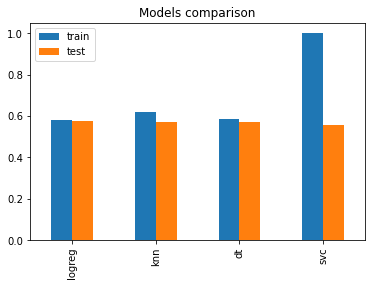

In [48]:
scores_df.plot(kind='bar')
plt.title("Models comparison")
plt.show()

We can see that all models predict reviews approximately equally, so we can choose any model for predictions.

### 1.3 Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

  PCA is widely used for dimension reduction. To reduce the number of dimensions, we have to calculate the PCs and then decide if there is a lower number of PCs ($d$) than the number of features ($k$) in the data that we can use to accurately represent the data.  

 To reduce our data from the original $k$ dimensions to a lower number of $d$ dimensions, we:

1. Apply PCA to the original $k$-dimensional data set. 

2. Extract the ratios of variance explained by each PC. 

3. Use one of the following methods to decide how many PCs can represent the data well enough:

    1. Make a line plot of the explained variance ratios. Look for an elbow in the plot to decide how many PCs are sufficient, as that will tell you that adding more PCs is not significantly raising the variance explained. 
    
    2. Decide on a threshold for how much variance needs to be explained by the PCs (e.g. if I want 80% of the variation explained, how many PCs do I need to include in my reduced dimension data?)
    
4. Based on our decision, re-fit PCA with the required number of PCs and use that as the lower-dimensional representation of your data. 


 We will follow this process and see if we can reduce the number of dimensions in our data sets.

In [49]:
# check X-train shape to see how many rows and columns
X_train.shape

(12798, 2743)

 There are $12,798$ data points and each is having $2,743$ features. There are $2,743$ dimensions. We will try to reduce them with PCA.

Before applying PCA, we need scale our data, so PCA works better. We will go with a Standard Scaler. We already have scaled train and test data sets. Lets' check these scaled sets again.

In [82]:
# repesting scaled just to make sure we have a scaled data.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

Let's apply PCA to the original 2,743-dimensional data set. 

In [83]:
my_pca = PCA(n_components=2743)


X_train_ss_pca = my_pca.fit_transform(X_train_ss)

In [84]:
X_test_ss_pca = my_pca.transform(X_test_ss)

Next, let's extract the ratios of variance explained by each PC and print these ratios.

In [85]:
expl_var = my_pca.explained_variance_ratio_
print(expl_var)

[7.63785922e-03 4.72719774e-03 2.18023902e-03 ... 1.56122090e-36
 1.35982792e-36 6.58791954e-37]


Now we cad decide how many PCs to use by plotting the 'elbow' plot.

A) Elbow plot - plot the chart of 'PCA vs. Proportion of Variance Explained' and identify the "elbow" point to choose the number of features.

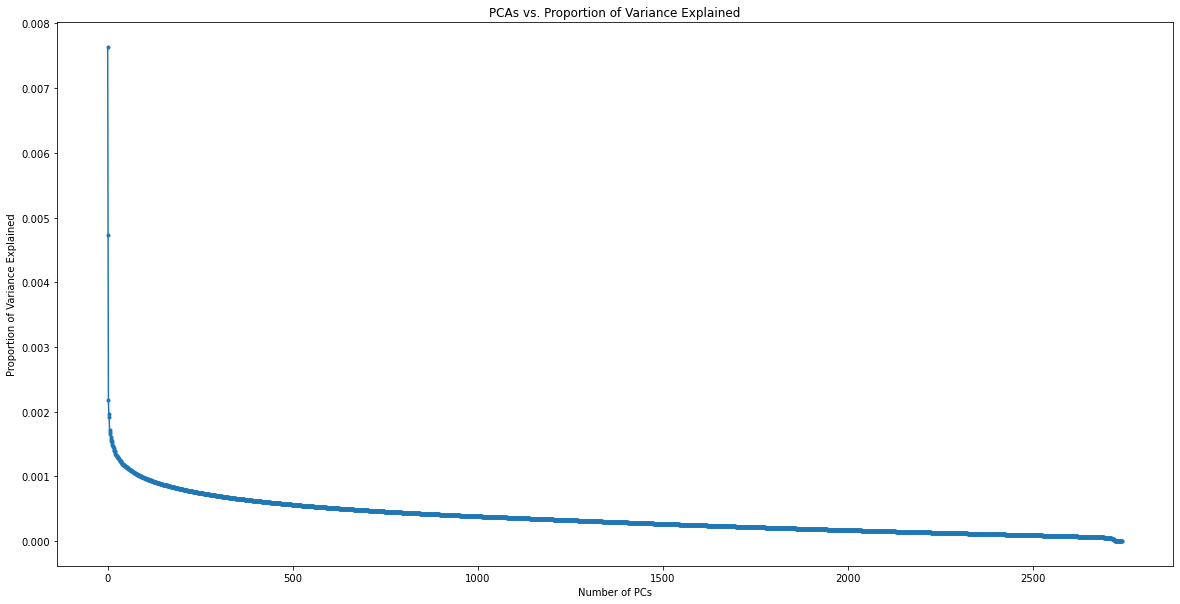

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCAs vs. Proportion of Variance Explained')
plt.show()

Based on the plot above, there is no right answer, as there is no sharp elbow in the plot. We can say that at approximatly 100 features the plot line goes flat.


I decide to go with 100 features in our case.

B) Use a preset threshold for proportion of variance explained. 

The easiest way to do this is to get the cumulative sum of the proportion of variance explained.

In [55]:
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()
print(expl_var_cumulative)

[0.00763786 0.01236506 0.0145453  ... 1.         1.         1.        ]


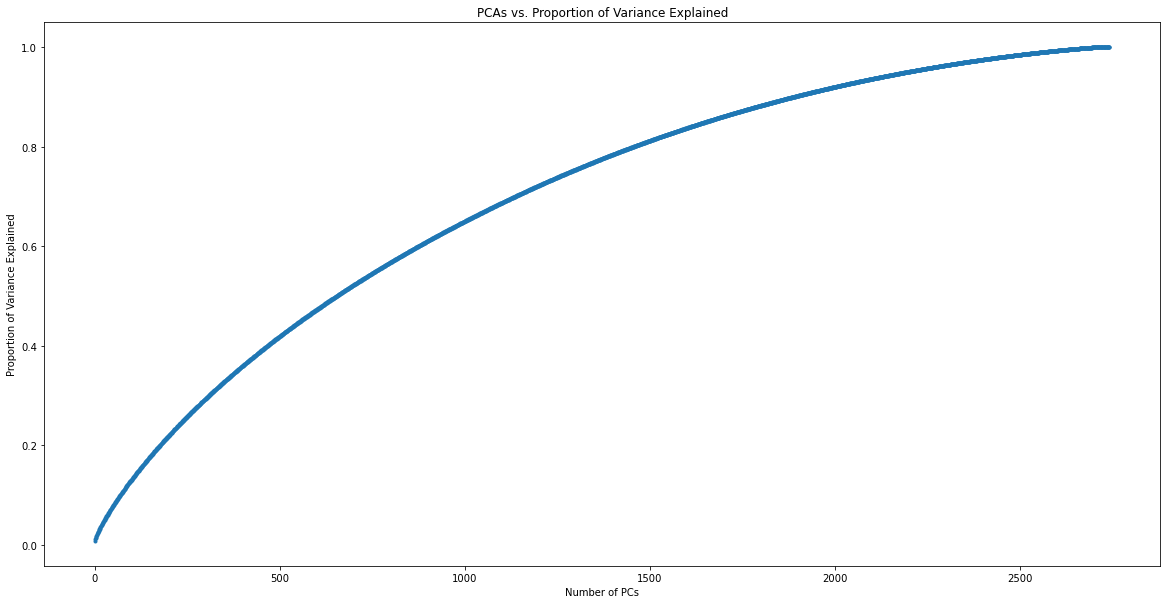

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(expl_var_cumulative,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCAs vs. Proportion of Variance Explained')
plt.show()

These cumulative sums are usually easy to interpret. However, not in our case.
We can see that:

1. 7% of the variation in the data is contained in the direction of the first PC (0.00763786)
2 .2% of the variation in the data is contained in the directions of BOTH the first and second PC (0.01236506)
3 .4% of the variation in the data is contained in the directions of the first, second AND third PC (0.0145453)
When all PCs are included, we see that 100% of the variation is explained.


Let's  chose which method to use for deciding an appropriate number of PCs. Let's use the common number of 100 PCs that we discovered.

Next, we will fit a train data with PCA=100, and transform our train and test data sets and call them X_train_pca and X_test_pca. We will print the shapes of X_train_pca and X_test_pca to make sure the transformation was successful.

In [86]:
my_PCA = PCA(n_components=100)

X_train_ss_pca = my_PCA.fit_transform(X_train_ss)
X_test_ss_pca = my_PCA.transform(X_test_ss)

print(X_train_pca.shape)
print(X_test_pca.shape)

(12798, 100)
(4267, 100)


We successfully perform a transformation of the original data and brought the number of dimensions down to 100.

Let's now fit a logistic regression on the original data and the transformed with PCA data and see how the models compare. Original data has  2743 dimensions, and the transformed data has 100 dimensions. We will time the models for comparisons to see which model is quicker.

Logistic regression with the original data.

In [89]:
%%time
    
    # Instantiate the model,  original data
logreg = LogisticRegression(C=0.0001, max_iter=1000)

    # Fit the model 
logreg.fit(X_train_ss, y_train)

logreg.score(X_test_ss, y_test)

Wall time: 801 ms


0.7811108507147879

Logistic regression with the data with reduced dimensions - 100 features

In [88]:
%%time

# Instantiate the model, increase max_iter to 1000 
logreg = LogisticRegression(C=0.0001, max_iter=1000)

    # Fit the model 
logreg.fit(X_train_ss_pca, y_train)

logreg.score(X_test_ss_pca, y_test)

Wall time: 39.9 ms


0.7668150925708929

 We can see that the running time for data where we applied PCA ie reduced dimensions is significantly less. We went down from 801 ms to 39.9 ms WHICH IS A HUGE IMPROVEMENT.

### 1.4 List one advantage and one disadvantage of dimensionality reduction

Advantages of Principal Component Analysis (dimensionality reduction):
1. PCA removes correlated features:

Very often we deal with data sets that have a very large number of features, and often these features are correlated with each other. While performing PCA, we reduce the number of features thus we reduce overall correlations.

2. PCs decreases model running time: 

We have proved that with a reduced number of features we decrease the model running time which is easily explained: the model has fewer features to run through thus reducing its running time.

So, if the input dimensions are too high, then using PCA to speed up the algorithm is a reasonable choice.

3. PCA reduces overfitting: 

With fewer variables, there is less overfitting of the model.



Disadvantages of Principal Component Analysis:
1. Independent variables become less interpretable:

During PCA we bring the dimensions down by collapsing them to a less dimensional domain. These reduced dimensional components are linear interpretations of the original features, but during this process, we reduce our ability to interpret the original features.

2. Data standardization is a must before PCA: 

We must standardize and scale data before implementing PCA, or PCA will not be able to find the optimal principal components.
If data is not standardized and scaled, PCA will be biased towards larger numbers in units and scales even if those numbers are not larger when brought to the standard metric of scale. (For example, 10 cm is not larger than 1 m, but the algorithm treats 10 cm as a larger number).


3. Information Loss: 

We chose the number of principal components much less than the original number of features, and as a result, we do lose original information. Also, there is a lot of subjectivity in choosing the number of principal components.

(https://www.i2tutorials.com/what-are-the-pros-and-cons-of-the-pca/)
(http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of_4.html)
(https://www.scirp.org/pdf/JSIP_2013101711003963.pdf)


## 2. Employ a K-Nearest Neighbour classifier on this dataset:

### 2.1 Fit a KNN model to this data. What is the accuracy score on the test set?

Let's fit a KNN model to data. But firstly, we need to scale the train and test sets. We will use the Standard Scaler algorithm. We already have scaled our data, but let's just repeat this process to be sure it is done. Also, on a scaled data we will perform PVA - already done as well.

In [60]:
#Transform the training and test sets 
X_train_ss = SS.transform(X_train)
X_test_ss = SS.transform(X_test)

In [ ]:
my_PCA = PCA(n_components=100)

X_train_ss_pca = my_PCA.fit_transform(X_train_ss)
X_test_ss_pca = my_PCA.transform(X_test_ss)


We will try to find an optimal number of k in KNN. We will go through the range of ks from 1 to 50 with a step of 2 (1,3,5 etc.). We will compare the accuracy scores of the model accuracy test scores as always.

In [302]:
# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50, 10)

# Empty lists to append the accuracies to 
train_acc_ss_pca = []
test_acc_ss_pca = []

# Loop through neighbors
for K in neighbors:
    
    # Instantiate the model 
    KNN = KNeighborsClassifier(n_neighbors=K)
    
    # Fit the model 
    KNN.fit(X_train_ss_pca, y_train)
    
    # Score the model 
    train_acc_ss_pca.append(KNN.score(X_train_ss_pca, y_train))
    test_acc_ss_pca.append(KNN.score(X_test_ss_pca, y_test))

In [303]:
print(train_acc_ss_pca)
print(test_acc_ss_pca)

[1.0, 0.7218315361775277, 0.7117518362244101, 0.7006563525550867, 0.6726050945460228]
[0.5973752050621045, 0.6503398172017811, 0.657839231310054, 0.6679165690180454, 0.6475275369111788]


We will plot "Train vs test accuracy" and try to pick the best k (where accuracy score is the highest).

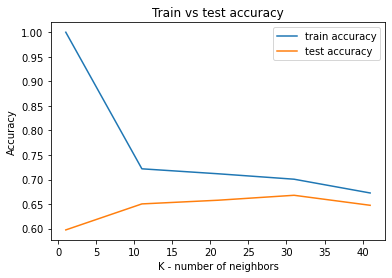

In [304]:
k_values = list(range(1, 50, 10))
plt.figure()
plt.plot(k_values, train_acc_ss_pca, label="train accuracy")
plt.plot(k_values, test_acc_ss_pca, label="test accuracy")
plt.title("Train vs test accuracy")
plt.xlabel("K - number of neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Looks like the best choice for number of ks here is k=32 (accuracy score is about 67%). Now, we will fit our model with k=32.

In [360]:
# Instantiate the model 
KNN = KNeighborsClassifier(n_neighbors=32)
    
# Fit the model 
KNN.fit(X_train_ss_pca, y_train)
    
 # Score the model 
KNN.score(X_train_ss_pca, y_train)
KNN.score(X_test_ss_pca, y_test)

0.5760487461917038

The KNN model accuracy score is 0.576 or 57.6% - not a good score. Maybe, it would have used a validation set, we could have found a more optimized k-number, and as a result, achieved a better accuracy score for our model.

### 2.2 KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

Reducing the number of observations in the data frame (reducing rows) can be achieved by a simple 'df.sample' feature in pandas. To reduce the computational time I will randomly select 10% of the data. This means that we will keep 426 observations in the test set (10% of 4,267 is 426), and 1,280 observations in the train set (10% of 12,798 is 1,280).

In [210]:
#checking df_test
df_test

Additional_Number_of_Scoring  Average_Score  \
0                             1005            8.3   
1                              487            8.8   
2                              570            9.3   
3                             2623            8.7   
4                              365            8.1   
...                            ...            ...   
4262                           335            8.5   
4263                           406            8.2   
4264                           581            8.4   
4265                           620            9.0   
4266                           744            8.3   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     0                     3469   
1                                    46                     1805   
2                                     0                     2319   
3                                    19                    12158   
4                                    13                     1567   
...                                 ...                      ...   
4262                                  0                      944   
4263                                 72                     2011   
4264                                 16                     1994   
4265                                 58                     1974   
4266                                  7                     2474   

      Review_Total_Positive_Word_Counts  \
0                                     6   
1                                   121   
2                                     9   
3                                     0   
4                                     0   
...                                 ...   
4262                                  7   
4263                                  0   
4264                                 12   
4265                                 24   
4266                                  8   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              2                297   
1                                              1                  4   
2                                              1                590   
3                                              2                269   
4                                              2                373   
...                                          ...                ...   
4262                                           1                269   
4263                                           9                324   
4264                                           1                496   
4265                                          11                131   
4266                                           2                548   

            lat       lng  weekday_of_review  ...  n_n_worry  n_n_worth  \
0     51.559096 -0.284704                  0  ...          0          0   
1     51.474469 -0.019428                  6  ...          0          0   
2     51.505696 -0.101525                  1  ...          0          0   
3     51.500961 -0.116591                  0  ...          0          0   
4     51.515125 -0.160066                  1  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
4262  51.540394 -0.369758                  0  ...          0          0   
4263  51.517972 -0.128049                  1  ...          0          0   
4264  51.507894 -0.143671                  4  ...          0          0   
4265  51.506558 -0.004514                  5  ...          0          0   
4266  51.529142 -0.137278                  1  ...          0          0   

      n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  n_n_young  \
0             0          0          0         0        0        0          0   
1             0          0          0         0        0        0          0   
2             0          0          0    

In [211]:
#checking df_train
df_train

Additional_Number_of_Scoring  Average_Score  \
0                               620            9.0   
1                              1258            9.4   
2                               995            8.1   
3                               853            8.4   
4                              1243            8.1   
...                             ...            ...   
12793                            68            7.8   
12794                          1172            7.8   
12795                           562            8.5   
12796                           154            8.0   
12797                           390            7.8   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     1974   
1                                      6                     4204   
2                                      2                     3826   
3                                      7                     2726   
4                                     11                     6608   
...                                  ...                      ...   
12793                                  2                      264   
12794                                 10                     5945   
12795                                  0                     1944   
12796                                 13                      768   
12797                                  7                     1717   

       Review_Total_Positive_Word_Counts  \
0                                    164   
1                                      4   
2                                     38   
3                                     10   
4                                      8   
...                                  ...   
12793                                 20   
12794                                  8   
12795                                 26   
12796                                  6   
12797                                  9   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                               1                562   
1                                               5                276   
2                                               1                129   
3                                              10                164   
4                                              69                639   
...                                           ...                ...   
12793                                           2                185   
12794                                          16                627   
12795                                           5                702   
12796                                           2                 24   
12797                                           2                526   

             lat       lng  weekday_of_review  ...  n_worry  n_worth  n_would  \
0      51.506558 -0.004514                  1  ...        0        0        0   
1      51.502435 -0.000250                  0  ...        0        0        0   
2      51.504348 -0.033444                  0  ...        0        0        0   
3      51.507377  0.038657                  0  ...        0        0        0   
4      51.513556 -0.180002                  1  ...        0        0        0   
...          ...       ...                ...  ...      ...      ...      ...   
12793  51.522087 -0.108244                  0  ...        0        0        0   
12794  51.499981 -0.192879                  6  ...        0        0        0   
12795  51.492418 -0.278470                  1  ...        0        0        0   
12796  51.512676 -0.186783                  0  ...        0        0        0   
12797  51.492627 -0.228860                  2  ...        0        0        0   

       n_write  n_wrong  n_year  n_yes  n_yet  n_young  rating  
0            0        0       0      0      0        0       1  
1            0        0       0 

In [212]:
#sampling df_test to keep 426 observations
df_test_sample = df_test.sample(426)

In [213]:
df_test_sample

Additional_Number_of_Scoring  Average_Score  \
2071                           140            7.4   
1986                           804            9.1   
4146                          2682            7.1   
4200                           690            8.6   
3476                           602            8.5   
...                            ...            ...   
3225                           406            8.2   
3993                           360            8.3   
91                              70            8.1   
3231                           974            9.0   
696                            417            6.7   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
2071                                 11                      895   
1986                                 15                     3802   
4146                                  0                     9086   
4200                                 47                     2890   
3476                                  9                     2494   
...                                 ...                      ...   
3225                                  0                     2011   
3993                                  0                     1181   
91                                    0                      276   
3231                                  9                     3040   
696                                  25                     2400   

      Review_Total_Positive_Word_Counts  \
2071                                 10   
1986                                  2   
4146                                  5   
4200                                 12   
3476                                  0   
...                                 ...   
3225                                  4   
3993                                 35   
91                                    5   
3231                                 31   
696                                   5   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
2071                                           2                279   
1986                                           5                294   
4146                                           1                 79   
4200                                           1                604   
3476                                           3                255   
...                                          ...                ...   
3225                                           3                170   
3993                                           2                262   
91                                            20                118   
3231                                           5                247   
696                                            3                379   

            lat       lng  weekday_of_review  ...  n_n_worry  n_n_worth  \
2071  51.499279 -0.197359                  4  ...          0          0   
1986  51.505151 -0.100472                  3  ...          0          0   
4146  51.501910 -0.023221                  1  ...          0          0   
4200  51.503940 -0.224423                  1  ...          0          0   
3476  51.506935 -0.126012                  0  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
3225  51.517972 -0.128049                  1  ...          0          0   
3993  51.475172 -0.187063                  0  ...          0          0   
91    51.546063 -0.070082                  4  ...          0          0   
3231  51.500732 -0.016550                  1  ...          0          0   
696   51.512450 -0.179522                  2  ...          0          0   

      n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  n_n_young  \
2071          0          0          0         0        0        0          0   
1986          0          0          0         0        0        0          0   
4146          0          0          0    

In [214]:
#reset indexes 
df_test_sample.reset_index(drop=True, inplace=True)

In [215]:
#checking df_test_sample
df_test_sample

Additional_Number_of_Scoring  Average_Score  \
0                             140            7.4   
1                             804            9.1   
2                            2682            7.1   
3                             690            8.6   
4                             602            8.5   
..                            ...            ...   
421                           406            8.2   
422                           360            8.3   
423                            70            8.1   
424                           974            9.0   
425                           417            6.7   

     Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                   11                      895   
1                                   15                     3802   
2                                    0                     9086   
3                                   47                     2890   
4                                    9                     2494   
..                                 ...                      ...   
421                                  0                     2011   
422                                  0                     1181   
423                                  0                      276   
424                                  9                     3040   
425                                 25                     2400   

     Review_Total_Positive_Word_Counts  \
0                                   10   
1                                    2   
2                                    5   
3                                   12   
4                                    0   
..                                 ...   
421                                  4   
422                                 35   
423                                  5   
424                                 31   
425                                  5   

     Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review        lat  \
0                                             2                279  51.499279   
1                                             5                294  51.505151   
2                                             1                 79  51.501910   
3                                             1                604  51.503940   
4                                             3                255  51.506935   
..                                          ...                ...        ...   
421                                           3                170  51.517972   
422                                           2                262  51.475172   
423                                          20                118  51.546063   
424                                           5                247  51.500732   
425                                           3                379  51.512450   

          lng  weekday_of_review  ...  n_n_worry  n_n_worth  n_n_would  \
0   -0.197359                  4  ...          0          0          0   
1   -0.100472                  3  ...          0          0          0   
2   -0.023221                  1  ...          0          0          0   
3   -0.224423                  1  ...          0          0          0   
4   -0.126012                  0  ...          0          0          0   
..        ...                ...  ...        ...        ...        ...   
421 -0.128049                  1  ...          0          0          0   
422 -0.187063                  0  ...          0          0          0   
423 -0.070082                  4  ...          0          0          0   
424 -0.016550                  1  ...          0          0          0   
425 -0.179522                  2  ...          0          0          0   

     n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  n_n_young  rating  
0            0          0         0        0        0          0       0  
1            0          0         0        0        0     

In [216]:
#sampling df_train to keep 1,280 observations
df_train_sample = df_train.sample(1280)

In [217]:
#reset indexes 
df_train_sample.reset_index(drop=True, inplace=True)

In [218]:
#checking df_train_sample
df_train_sample

Additional_Number_of_Scoring  Average_Score  \
0                              398            7.9   
1                              438            7.4   
2                             1471            9.1   
3                              278            8.1   
4                              620            9.0   
...                            ...            ...   
1275                           525            8.2   
1276                            70            8.1   
1277                           256            9.1   
1278                           409            8.4   
1279                           144            8.2   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     7                     1521   
1                                    30                     1786   
2                                     0                     4802   
3                                   103                     1042   
4                                    16                     1974   
...                                 ...                      ...   
1275                                 46                     1842   
1276                                  0                      276   
1277                                 20                      949   
1278                                 43                     1479   
1279                                 22                      525   

      Review_Total_Positive_Word_Counts  \
0                                    21   
1                                     3   
2                                    18   
3                                    25   
4                                     6   
...                                 ...   
1275                                  6   
1276                                 42   
1277                                  7   
1278                                  9   
1279                                 35   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              9                486   
1                                             16                181   
2                                              2                576   
3                                              5                658   
4                                             19                221   
...                                          ...                ...   
1275                                           1                458   
1276                                           1                256   
1277                                           5                335   
1278                                           3                423   
1279                                           2                  0   

            lat       lng  weekday_of_review  ...  n_worry  n_worth  n_would  \
0     51.526662 -0.129657                  0  ...        0        0        0   
1     51.496740 -0.206472                  4  ...        0        0        0   
2     51.527847 -0.088947                  1  ...        0        0        0   
3     51.535760 -0.190259                  3  ...        0        0        0   
4     51.506558 -0.004514                  6  ...        0        0        0   
...         ...       ...                ...  ...      ...      ...      ...   
1275  51.481663 -0.190957                  0  ...        0        0        0   
1276  51.546063 -0.070082                  6  ...        0        0        0   
1277  51.516048 -0.088018                  4  ...        0        0        0   
1278  51.513198 -0.117450                  0  ...        0        0        1   
1279  51.457299 -0.205543                  3  ...        0        0        0   

      n_write  n_wrong  n_year  n_yes  n_yet  n_young  rating  
0           0        0       0      0      0        0       1  
1           0        1       0      0      0        0       0  
2           0        0       

Next, we will assign our X and y variables.
We will assign X and y values to both data sets - df_train_sample and df_train_sample data sets. To assign X and y values, for X values we will drop a feature 'rating', and for y value, we will keep only a feature 'rating' which is our target. We will do these steps for both data sets.

In [221]:
# Assigning features to the train set

# Assigning our features to X 
X_train_sample = df_train_sample.drop(['rating'], axis=1)

# Assigning our target to y 
y_train_sample = df_train_sample['rating']

# Check 
display(X_train_sample)
print(y_train_sample)

Additional_Number_of_Scoring  Average_Score  \
0                              398            7.9   
1                              438            7.4   
2                             1471            9.1   
3                              278            8.1   
4                              620            9.0   
...                            ...            ...   
1275                           525            8.2   
1276                            70            8.1   
1277                           256            9.1   
1278                           409            8.4   
1279                           144            8.2   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     7                     1521   
1                                    30                     1786   
2                                     0                     4802   
3                                   103                     1042   
4                                    16                     1974   
...                                 ...                      ...   
1275                                 46                     1842   
1276                                  0                      276   
1277                                 20                      949   
1278                                 43                     1479   
1279                                 22                      525   

      Review_Total_Positive_Word_Counts  \
0                                    21   
1                                     3   
2                                    18   
3                                    25   
4                                     6   
...                                 ...   
1275                                  6   
1276                                 42   
1277                                  7   
1278                                  9   
1279                                 35   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              9                486   
1                                             16                181   
2                                              2                576   
3                                              5                658   
4                                             19                221   
...                                          ...                ...   
1275                                           1                458   
1276                                           1                256   
1277                                           5                335   
1278                                           3                423   
1279                                           2                  0   

            lat       lng  weekday_of_review  ...  n_world  n_worry  n_worth  \
0     51.526662 -0.129657                  0  ...        0        0        0   
1     51.496740 -0.206472                  4  ...        0        0        0   
2     51.527847 -0.088947                  1  ...        0        0        0   
3     51.535760 -0.190259                  3  ...        0        0        0   
4     51.506558 -0.004514                  6  ...        0        0        0   
...         ...       ...                ...  ...      ...      ...      ...   
1275  51.481663 -0.190957                  0  ...        0        0        0   
1276  51.546063 -0.070082                  6  ...        0        0        0   
1277  51.516048 -0.088018                  4  ...        0        0        0   
1278  51.513198 -0.117450                  0  ...        0        0        0   
1279  51.457299 -0.205543                  3  ...        0        0        0   

      n_would  n_write  n_wrong  n_year  n_yes  n_yet  n_young  
0           0        0        0       0      0      0        0  
1           0        0        1       0      0      0        0  
2           0        0    

0       1
1       0
2       1
3       0
4       1
       ..
1275    1
1276    0
1277    0
1278    0
1279    1
Name: rating, Length: 1280, dtype: int64


In [222]:
# Assigning features to the test set

# Assigning our features to X 
X_test_sample = df_test_sample.drop(['rating'], axis=1)

# Assigning our target to y 
y_test_sample = df_test_sample['rating']

# Check 
display(X_test_sample)
print(y_test_sample)

Additional_Number_of_Scoring  Average_Score  \
0                             140            7.4   
1                             804            9.1   
2                            2682            7.1   
3                             690            8.6   
4                             602            8.5   
..                            ...            ...   
421                           406            8.2   
422                           360            8.3   
423                            70            8.1   
424                           974            9.0   
425                           417            6.7   

     Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                   11                      895   
1                                   15                     3802   
2                                    0                     9086   
3                                   47                     2890   
4                                    9                     2494   
..                                 ...                      ...   
421                                  0                     2011   
422                                  0                     1181   
423                                  0                      276   
424                                  9                     3040   
425                                 25                     2400   

     Review_Total_Positive_Word_Counts  \
0                                   10   
1                                    2   
2                                    5   
3                                   12   
4                                    0   
..                                 ...   
421                                  4   
422                                 35   
423                                  5   
424                                 31   
425                                  5   

     Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review        lat  \
0                                             2                279  51.499279   
1                                             5                294  51.505151   
2                                             1                 79  51.501910   
3                                             1                604  51.503940   
4                                             3                255  51.506935   
..                                          ...                ...        ...   
421                                           3                170  51.517972   
422                                           2                262  51.475172   
423                                          20                118  51.546063   
424                                           5                247  51.500732   
425                                           3                379  51.512450   

          lng  weekday_of_review  ...  n_n_world  n_n_worry  n_n_worth  \
0   -0.197359                  4  ...          0          0          0   
1   -0.100472                  3  ...          0          0          0   
2   -0.023221                  1  ...          0          0          0   
3   -0.224423                  1  ...          0          0          0   
4   -0.126012                  0  ...          0          0          0   
..        ...                ...  ...        ...        ...        ...   
421 -0.128049                  1  ...          0          0          0   
422 -0.187063                  0  ...          0          0          0   
423 -0.070082                  4  ...          0          0          0   
424 -0.016550                  1  ...          0          0          0   
425 -0.179522                  2  ...          0          0          0   

     n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  n_n_young  
0            0          0          0         0        0        0          0  
1            0          0          0         0      

0      0
1      0
2      1
3      0
4      1
      ..
421    1
422    1
423    1
424    1
425    0
Name: rating, Length: 426, dtype: int64


We will scale our data using Standard Scaler method. Scaling is very important in KNN models, as the number od neighbors is picked using distances between points.

In [361]:
#Transform the training and test sets 
scaler = StandardScaler()
scaler.fit(X_train_sample)

X_train_sample_ss = scaler.transform(X_train_sample)
X_test_sample_ss = scaler.transform(X_test_sample)

We will apply PCA to the scaled data. We will use 100 optimal components as we discovered earlier it's an appropriate number for our model.

In [ ]:
my_PCA = PCA(n_components=100)

X_train_sample_ss_pca = my_PCA.fit_transform(X_train_sample_ss)
X_test_sample_ss_pca = my_PCA.transform(X_test_sample_ss)


We will fit our KNN model for different ks and choose a k where the test accuracy is the highest.

In [363]:
# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50, 1)

# Empty lists to append the accuracies to 
train_sample_acc_ss_pca = []
test_sample_acc_ss_pca = []

# Loop through neighbors
for K in neighbors:
    
    # Instantiate the model 
    KNN = KNeighborsClassifier(n_neighbors=K)
    
    # Fit the model 
    KNN.fit(X_train_sample_ss_pca, y_train_sample)
    
    # Score the model 
    train_sample_acc_ss_pca.append(KNN.score(X_train_sample_ss_pca, y_train_sample))
    test_sample_acc_ss_pca.append(KNN.score(X_test_sample_ss_pca, y_test_sample))

In [364]:
print(train_acc_ss_pca)
print(test_acc_ss_pca)

[1.0, 0.7218315361775277, 0.7117518362244101, 0.7006563525550867, 0.6726050945460228]
[0.5973752050621045, 0.6503398172017811, 0.657839231310054, 0.6679165690180454, 0.6475275369111788]


We will plot our train and test accuracies scores to choose the best k.

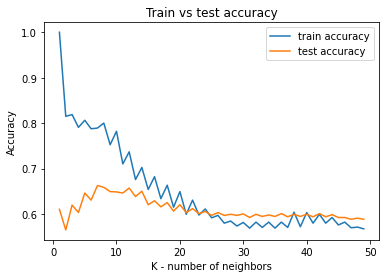

In [365]:
k_values = list(range(1, 50, 1))
plt.figure()
plt.plot(k_values, train_sample_acc_ss_pca, label="train accuracy")
plt.plot(k_values, test_sample_acc_ss_pca, label="test accuracy")
plt.title("Train vs test accuracy")
plt.xlabel("K - number of neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The best test accuracy score is at k=8. It is about 68% accuracy. We will run the model with a k=8 number of neighbors. We will also time the models where we sampled the data and the model with the original unsampled data.

In [374]:
%%time
    
    # Instantiate the model 
    KNN = KNeighborsClassifier(n_neighbors=8)
    
    # Fit the model 
    KNN.fit(X_train_sample_ss_pca, y_train_sample)
    
    # Score the model 
    KNN.score(X_train_sample_ss_pca, y_train_sample)
    KNN.score(X_test_sample_ss_pca, y_test_sample)

Wall time: 17.7 s


0.65859375

In [375]:
print(KNN.score(X_train_sample_ss_pca, y_train_sample))


0.8


In [376]:
print(KNN.score(X_test_sample_ss_pca, y_test_sample))

0.65859375


The modeling time for the sampled data which is 10% of the original data is 17.7 sec, and the model accuracy is 65.9%
We can compare the timing for the original data scaled with Standard Scaler  and see what changes.

In [380]:
%%time
    
    # Instantiate the model 
    KNN = KNeighborsClassifier(n_neighbors=8)
    
    # Fit the model 
    KNN.fit(X_train_ss_pca, y_train)
    
    # Score the model 
KNN.score(X_train_ss_pca, y_train)
KNN.score(X_test_ss_pca, y_test)

Wall time: 13min 2s


0.6472931802202953

In [381]:
print(KNN.score(X_train_ss_pca, y_train))

0.7390998593530239


In [382]:
print(KNN.score(X_test_ss_pca, y_test))

0.6472931802202953


The modeling time for the original data is 13 min 2 sec, and the model accuracy is 64.7%

We can conclude that as we decrease the number of observations, the KNN model performs MUCH faster and interestingly, keeps approximately the same accuracy score.
We can apply the sampling method on large data sets to reduce the model's running time. 

### 2.3 List one advantage and one disadvantage of reducing the number of observations.

The obvious advantage of reducing the number of observations while performing the KNN method is a decrease in time to train the model. Particularly, a decrease in hyperparameters optimization time (finding a perfect k number for the model).
A disadvantage is decreasing the model prediction score which we do not see in our example. We would expect that the accuracy score of the sampled data would be lower than in the original data as we have less data for the model to be trained on. Although, with less training, we can overcome the overfitting issue which is an advantage. With sampling, we miss lots of information, and there is a chance we miss some classes if these classes are imbalanced. We need to make sure that a sample set contains the same proportion of classes we try to predict as the original data.

### 2.4 Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

We will use the original data set now to find the best k for the KNN model. We will split our data set into train and validation sets. Since our data is already split into a train and a test set, we will need to split a train set into a train itself and a validation sets.
We will use a scaled and PCA-transformed data sets to fit and train our KNN model.

In [225]:
# checking train set
df_train

Additional_Number_of_Scoring  Average_Score  \
0                               620            9.0   
1                              1258            9.4   
2                               995            8.1   
3                               853            8.4   
4                              1243            8.1   
...                             ...            ...   
12793                            68            7.8   
12794                          1172            7.8   
12795                           562            8.5   
12796                           154            8.0   
12797                           390            7.8   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     1974   
1                                      6                     4204   
2                                      2                     3826   
3                                      7                     2726   
4                                     11                     6608   
...                                  ...                      ...   
12793                                  2                      264   
12794                                 10                     5945   
12795                                  0                     1944   
12796                                 13                      768   
12797                                  7                     1717   

       Review_Total_Positive_Word_Counts  \
0                                    164   
1                                      4   
2                                     38   
3                                     10   
4                                      8   
...                                  ...   
12793                                 20   
12794                                  8   
12795                                 26   
12796                                  6   
12797                                  9   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                               1                562   
1                                               5                276   
2                                               1                129   
3                                              10                164   
4                                              69                639   
...                                           ...                ...   
12793                                           2                185   
12794                                          16                627   
12795                                           5                702   
12796                                           2                 24   
12797                                           2                526   

             lat       lng  weekday_of_review  ...  n_worry  n_worth  n_would  \
0      51.506558 -0.004514                  1  ...        0        0        0   
1      51.502435 -0.000250                  0  ...        0        0        0   
2      51.504348 -0.033444                  0  ...        0        0        0   
3      51.507377  0.038657                  0  ...        0        0        0   
4      51.513556 -0.180002                  1  ...        0        0        0   
...          ...       ...                ...  ...      ...      ...      ...   
12793  51.522087 -0.108244                  0  ...        0        0        0   
12794  51.499981 -0.192879                  6  ...        0        0        0   
12795  51.492418 -0.278470                  1  ...        0        0        0   
12796  51.512676 -0.186783                  0  ...        0        0        0   
12797  51.492627 -0.228860                  2  ...        0        0        0   

       n_write  n_wrong  n_year  n_yes  n_yet  n_young  rating  
0            0        0       0      0      0        0       1  
1            0        0       0 

In [226]:
# checking test set
df_test

Additional_Number_of_Scoring  Average_Score  \
0                             1005            8.3   
1                              487            8.8   
2                              570            9.3   
3                             2623            8.7   
4                              365            8.1   
...                            ...            ...   
4262                           335            8.5   
4263                           406            8.2   
4264                           581            8.4   
4265                           620            9.0   
4266                           744            8.3   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     0                     3469   
1                                    46                     1805   
2                                     0                     2319   
3                                    19                    12158   
4                                    13                     1567   
...                                 ...                      ...   
4262                                  0                      944   
4263                                 72                     2011   
4264                                 16                     1994   
4265                                 58                     1974   
4266                                  7                     2474   

      Review_Total_Positive_Word_Counts  \
0                                     6   
1                                   121   
2                                     9   
3                                     0   
4                                     0   
...                                 ...   
4262                                  7   
4263                                  0   
4264                                 12   
4265                                 24   
4266                                  8   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              2                297   
1                                              1                  4   
2                                              1                590   
3                                              2                269   
4                                              2                373   
...                                          ...                ...   
4262                                           1                269   
4263                                           9                324   
4264                                           1                496   
4265                                          11                131   
4266                                           2                548   

            lat       lng  weekday_of_review  ...  n_n_worry  n_n_worth  \
0     51.559096 -0.284704                  0  ...          0          0   
1     51.474469 -0.019428                  6  ...          0          0   
2     51.505696 -0.101525                  1  ...          0          0   
3     51.500961 -0.116591                  0  ...          0          0   
4     51.515125 -0.160066                  1  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
4262  51.540394 -0.369758                  0  ...          0          0   
4263  51.517972 -0.128049                  1  ...          0          0   
4264  51.507894 -0.143671                  4  ...          0          0   
4265  51.506558 -0.004514                  5  ...          0          0   
4266  51.529142 -0.137278                  1  ...          0          0   

      n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  n_n_young  \
0             0          0          0         0        0        0          0   
1             0          0          0         0        0        0          0   
2             0          0          0    

We already have split train and test sets. To get a validation set, we need to split our train set. We will go with a train set of 70% and a validation set of 30%. 
We could have chosen a different percentage though or apply a cross-validation method.

We will assign our X and y variables now using df_train and df_test data frames. We have done it already.

In [ ]:
# Assigning our features to X 
X_train = df_train.drop(['rating'], axis=1)

# Assigning our target to y 
y_train = df_train['rating']


# Assigning our features to X 
X_test = df_test.drop(['rating'], axis=1)

# Assigning our target to y 
y_test = df_test['rating']

We will split our X and y train variables into a new X train ( X_train2) and y train (y_train2) and X validation (X_valid2)and y validation (y_valid2) variables. We will use a 'train_test_split' sklearn method. We will keep a new test size of 70%, and a validation test size of 30%.

In [228]:
#split our train X and y  into new x and y.  
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train, y_train, train_size=0.7,test_size=0.3, random_state=1)

In [373]:
#checking X-train2
X_train2.shape

(6270, 2743)

We have successfully split our original train set into new train and validation sets. The split proportion is 70/30% with a new train set being 70 of the original train set.

We will follow the following steps in order to fit a KNN model: 
 - scaling - scale train, validation, and test sets
 - PCA - reduce dimensions on train, validation, and test sets
 - modeling - use a train and a test sets.

Scaling.

We will use a standard scaler on a train, validation, and test sets. We will fit a scaler on a train set (X_train2), and then transform a train (X_train2), validation, and test sets.

In [230]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler
SS.fit(X_train2)

# Transform the train set 
X_t_ss = SS.transform(X_train2)


# Transform the validation set
X_v_ss = SS.transform(X_valid2)


# Transform the test set
X_test_ss = SS.transform(X_test)


PCA 

We will reduce dimensions using the elbow method. We will find an appropriate number of dimensions using train and validation sets, and then apply our findings to all sets including a test set. We'll start with keeping all dimensions which are 2,743.

In [231]:
# Instantiate & fit PCA model 
# Generate all 2,743 PCs

my_pca = PCA(n_components=2743)

# Fit and transform the train set
X_t_ss_pca = my_pca.fit_transform(X_t_ss)

In [232]:
# Transform the validation set
X_v_ss_pca=my_pca.transform(X_v_ss)

We will find an explained variance ratio for a train and validation sets, then plot these values and extract the elbow point where there is an optimal number of principal parameters.

In [233]:
expl_var = my_pca.explained_variance_ratio_
print(expl_var)

[7.77438091e-03 4.78868030e-03 2.45886250e-03 ... 4.42178165e-36
 1.50709166e-36 5.20008222e-39]


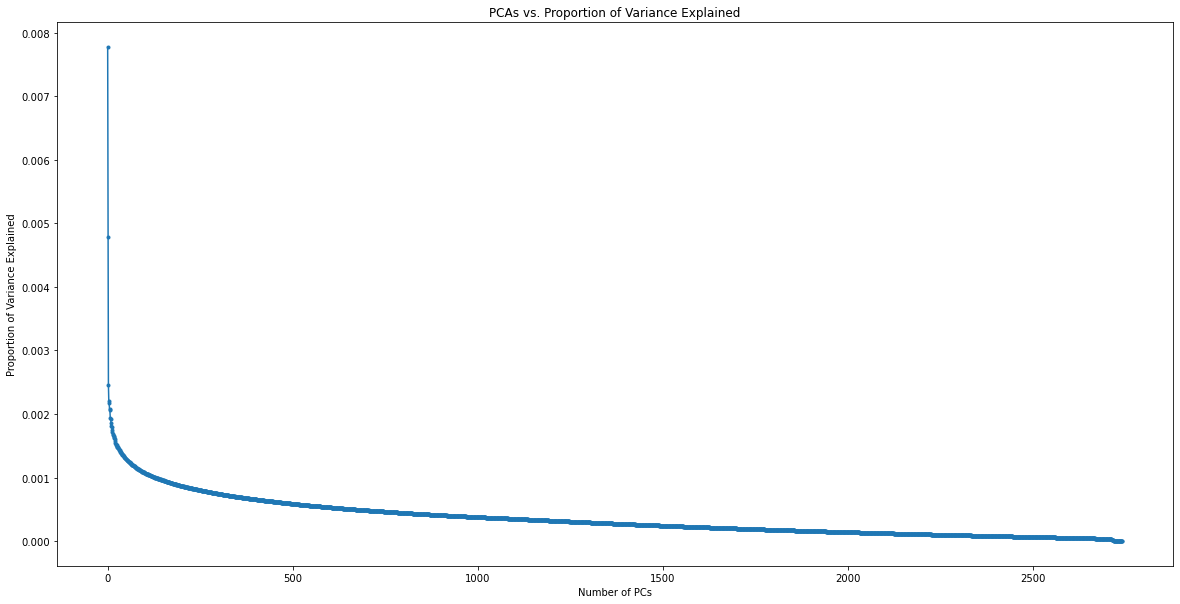

In [70]:
plt.figure(figsize=(20, 10))
plt.plot(expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCAs vs. Proportion of Variance Explained')
plt.show()

We can see that after 100 dimensions the line goes flat. From this elbow graph we can pick 100 dimensions.

In [71]:
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()
print(expl_var_cumulative)

[0.00777438 0.01256306 0.01502192 ... 1.         1.         1.        ]


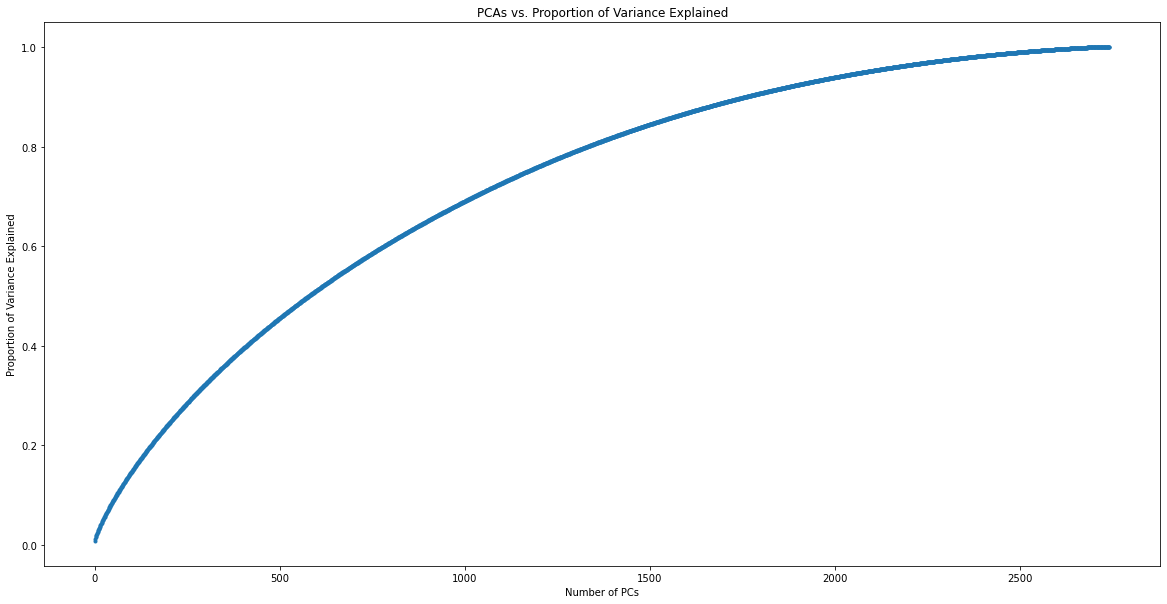

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(expl_var_cumulative,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCAs vs. Proportion of Variance Explained')
plt.show()

The cumulative variance is not very helpful here, so we will go with an elbow method result.

We will assign 100 components (dimensions) to our test, validation and test sets.

In [75]:
#will apply PCA now where number of components is 100
my_PCA = PCA(n_components=100)

# fir and transgorm a train set
X_t_pca_ss = my_PCA.fit_transform(X_t_ss)

#transform a validation set
X_v_pca_ss = my_PCA.transform(X_v_ss)

#transform a test set
X_test_pca_ss = my_PCA.transform(X_test_ss)

 Modeling (training) to find the k number.
 
 

We will start with a broad range of k numbers to see if we can narrow down our search. We will choose k so that the model with k numbers has the highest accuracy score. Our k range is from 1 to 1000 with a step of 1.

In [59]:
# The different K values to try out and save to 'neighbors'
neighbors = range(1, 1000, 1)

# Empty lists to append the accuracies to 
train_acc = []
val_acc = []

# Loop through neighbors
for K in neighbors:
    
    # Instantiate the model 
    KNN = KNeighborsClassifier(n_neighbors=K)
    
    # Fit the model 
    KNN.fit(X_t_pca_ss, y_train2)
    
    # Score the model 
    train_acc.append(KNN.score(X_t_pca_ss, y_train2))
    val_acc.append(KNN.score(X_v_pca, y_valid2))

We will print train and validation accuracies scores and plot them to find the best k with the highest accuracy score.
We use a validation set instead of a test set so we do not leak data into the test set while optimizing our k parameter.

In [60]:
print(train_acc)
print(val_acc)

[1.0, 0.848292029470864, 0.8345612860013396, 0.8162536280419737, 0.7951551685644117, 0.796383121232418, 0.7790801518196026, 0.7834338021879884, 0.7672471533824514, 0.7765126144228622, 0.7641214556820719, 0.7730520205402992, 0.7596561732529582, 0.7691448984148247, 0.7587631167671355, 0.7685867381111855, 0.7542978343380219, 0.7621120785889708, 0.751395400759098, 0.7615539182853316, 0.748604599240902, 0.7547443625809332, 0.7446974771154276, 0.7520651931234651, 0.7445858450546997, 0.7510605045769145, 0.7427997320830543, 0.7502790801518197, 0.7414601473543202, 0.748604599240902, 0.7414601473543202, 0.7460370618441616, 0.739450770261219, 0.74302299620451, 0.7377762893503014, 0.7427997320830543, 0.7358785443179281, 0.7419066755972316, 0.7358785443179281, 0.7385577137753963, 0.7343156954677383, 0.7397856664434025, 0.7349854878321054, 0.7386693458361241, 0.7324179504353651, 0.736659968743023, 0.7313016298280867, 0.7362134405001116, 0.7286224603706184, 0.7331993748604599, 0.7263898191560616, 0.7

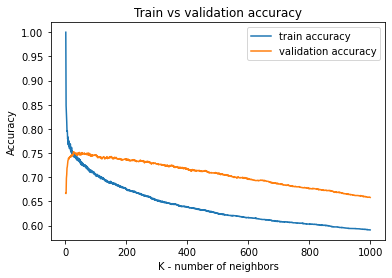

In [61]:
k_values = list(range(1, 1000, 1))
plt.figure()
plt.plot(k_values, train_acc, label="train accuracy")
plt.plot(k_values, val_acc, label="validation accuracy")
plt.title("Train vs validation accuracy")
plt.xlabel("K - number of neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Note: this model has taken over 11 hours to run! 
And there is no increase in accuracies scores after k is equal to approximately 50.


LESSON LEARNED: do not use such a high number of ks to search through as it is probably enough to search through 1 to 100 ks at maximum.

The best test accuracy score is around 50. Now we will try to find a more precise value.

We will search through k numbers from 1 to 70 and find the best k (k, where the test accuracy score is the highest).

In [78]:
# The different K values to try out and save to 'neighbors'
neighbors = range(1, 70, 1)

# Empty lists to append the accuracies to 
train_acc = []
val_acc = []

# Loop through neighbors
for K in neighbors:
    
    # Instantiate the model 
    KNN = KNeighborsClassifier(n_neighbors=K)
    
    # Fit the model 
    KNN.fit(X_t_pca_ss, y_train2)
    
    # Score the model 
    train_acc.append(KNN.score(X_t_pca_ss, y_train2))
    val_acc.append(KNN.score(X_v_pca, y_valid2))

In [63]:
print(train_acc)
print(val_acc)

[1.0, 0.848292029470864, 0.8345612860013396, 0.8162536280419737, 0.7951551685644117, 0.796383121232418, 0.7790801518196026, 0.7834338021879884, 0.7672471533824514, 0.7765126144228622, 0.7641214556820719, 0.7730520205402992, 0.7596561732529582, 0.7691448984148247, 0.7587631167671355, 0.7685867381111855, 0.7542978343380219, 0.7621120785889708, 0.751395400759098, 0.7615539182853316, 0.748604599240902, 0.7547443625809332, 0.7446974771154276, 0.7520651931234651, 0.7445858450546997, 0.7510605045769145, 0.7427997320830543, 0.7502790801518197, 0.7414601473543202, 0.748604599240902, 0.7414601473543202, 0.7460370618441616, 0.739450770261219, 0.74302299620451, 0.7377762893503014, 0.7427997320830543, 0.7358785443179281, 0.7419066755972316, 0.7358785443179281, 0.7385577137753963, 0.7343156954677383, 0.7397856664434025, 0.7349854878321054, 0.7386693458361241, 0.7324179504353651, 0.736659968743023, 0.7313016298280867, 0.7362134405001116, 0.7286224603706184, 0.7331993748604599, 0.7263898191560616, 0.7

We will plot our train and validation accuracies scores and pick the best k where the validation accuracy is the highest.

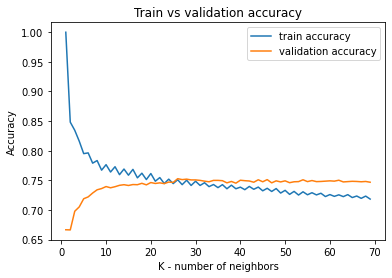

In [64]:
k_values = list(range(1, 70, 1))
plt.figure()
plt.plot(k_values, train_acc, label="train accuracy")
plt.plot(k_values, val_acc, label="validation accuracy")
plt.title("Train vs validation accuracy")
plt.xlabel("K - number of neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
n_neighbors=23

The best k number is 23, as the validation score is not changing much after k-23 meaning it is overfitting after 23 k-neighbors.

Note: this model has taken over 4 hours to run! 

Next, we will perform our modeling using the test set to check the model accuracy. The test set has not been seen by the model, and we hope that we will get unbiased results. Our goal is to use the model on unseen data and make sure we will get accurate predictions.

In [82]:
# Instantiate the model 
KNN = KNeighborsClassifier(n_neighbors=23)
    
# Fit the model 
KNN.fit(X_t_pca_ss, y_train2)
    
# Score the model 
print(KNN.score(X_t_pca_ss, y_train2))
print(KNN.score(X_test_pca_ss, y_test))

0.771824067872293
0.7384579329739864


The optimal number k is k = 23 neighbors for the KNN model. The model accuracy is 73.8%.
In our KNN model, we performed scaling and lowering data dimensions. Then, we have taken several steps to optimize k - a number of neighbors in the KNN model, our hyperparameter for the model. We discovered, that the best k is 23, and finally, we ran the KNN model with k=23 and received a test accuracy of 73.8%.

### 2.5 What is the issue with splitting the data into train and validation sets after performing vectorization?

The problem of splitting the data into train and validation sets after performing vectorization is potential data leakage. We perform a split test for a training test and a validation test because we want to optimize parameters and build the best possible model. To do that, we want to test out parameters on a validation test first, and then on a test set. With performing PCA before splitting a test and a validation test we introduce a data leak to the validation set which has seen out test data already and is biased now.

## 3. Employ a Decision Tree classifier on this dataset:

### 3.1 Fit a decision tree model to this data. What is the accuracy score on the test set?

 No need to scale data as this is a decision tree classifier - scaling doesn't improve model performance.

The model will be trained faster if I apply PCA. However, I will lose the ability to understand and explain the model tree splitting decisions. So, I will train the model without performing PCA.

 We will assign variables to train and test sets next. As always, we drop the feature which we want to predict and assign this data frame to x variable. And the dropped feature which is a target is assigned to the y variable. We have done this already, just making sure it works again.

In [61]:
# Assigning our features to X 
X_train = df_train.drop(['rating'], axis=1)

# Assigning our target to y 
y_train = df_train['rating']

# Check 
display(X_train)
print(y_train)

Additional_Number_of_Scoring  Average_Score  \
0                               620            9.0   
1                              1258            9.4   
2                               995            8.1   
3                               853            8.4   
4                              1243            8.1   
...                             ...            ...   
12793                            68            7.8   
12794                          1172            7.8   
12795                           562            8.5   
12796                           154            8.0   
12797                           390            7.8   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     1974   
1                                      6                     4204   
2                                      2                     3826   
3                                      7                     2726   
4                                     11                     6608   
...                                  ...                      ...   
12793                                  2                      264   
12794                                 10                     5945   
12795                                  0                     1944   
12796                                 13                      768   
12797                                  7                     1717   

       Review_Total_Positive_Word_Counts  \
0                                    164   
1                                      4   
2                                     38   
3                                     10   
4                                      8   
...                                  ...   
12793                                 20   
12794                                  8   
12795                                 26   
12796                                  6   
12797                                  9   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                               1                562   
1                                               5                276   
2                                               1                129   
3                                              10                164   
4                                              69                639   
...                                           ...                ...   
12793                                           2                185   
12794                                          16                627   
12795                                           5                702   
12796                                           2                 24   
12797                                           2                526   

             lat       lng  weekday_of_review  ...  n_world  n_worry  n_worth  \
0      51.506558 -0.004514                  1  ...        0        0        0   
1      51.502435 -0.000250                  0  ...        0        0        0   
2      51.504348 -0.033444                  0  ...        0        0        0   
3      51.507377  0.038657                  0  ...        0        0        0   
4      51.513556 -0.180002                  1  ...        0        0        0   
...          ...       ...                ...  ...      ...      ...      ...   
12793  51.522087 -0.108244                  0  ...        0        0        0   
12794  51.499981 -0.192879                  6  ...        0        0        0   
12795  51.492418 -0.278470                  1  ...        0        0        0   
12796  51.512676 -0.186783                  0  ...        0        0        0   
12797  51.492627 -0.228860                  2  ...        0        0        0   

       n_would  n_write  n_wrong  n_year  n_yes  n_yet  n_young  
0            0        0        0       0      0      0        0  
1            0        0       

0        1
1        1
2        1
3        0
4        0
        ..
12793    0
12794    0
12795    1
12796    0
12797    1
Name: rating, Length: 12798, dtype: int64


In [62]:
# Assigning our features to X 
X_test = df_test.drop(['rating'], axis=1)

# Assigning our target to y 
y_test = df_test['rating']

# Check 
display(X_test)
print(y_test)

Additional_Number_of_Scoring  Average_Score  \
0                             1005            8.3   
1                              487            8.8   
2                              570            9.3   
3                             2623            8.7   
4                              365            8.1   
...                            ...            ...   
4262                           335            8.5   
4263                           406            8.2   
4264                           581            8.4   
4265                           620            9.0   
4266                           744            8.3   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     0                     3469   
1                                    46                     1805   
2                                     0                     2319   
3                                    19                    12158   
4                                    13                     1567   
...                                 ...                      ...   
4262                                  0                      944   
4263                                 72                     2011   
4264                                 16                     1994   
4265                                 58                     1974   
4266                                  7                     2474   

      Review_Total_Positive_Word_Counts  \
0                                     6   
1                                   121   
2                                     9   
3                                     0   
4                                     0   
...                                 ...   
4262                                  7   
4263                                  0   
4264                                 12   
4265                                 24   
4266                                  8   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              2                297   
1                                              1                  4   
2                                              1                590   
3                                              2                269   
4                                              2                373   
...                                          ...                ...   
4262                                           1                269   
4263                                           9                324   
4264                                           1                496   
4265                                          11                131   
4266                                           2                548   

            lat       lng  weekday_of_review  ...  n_n_world  n_n_worry  \
0     51.559096 -0.284704                  0  ...          0          0   
1     51.474469 -0.019428                  6  ...          0          0   
2     51.505696 -0.101525                  1  ...          0          0   
3     51.500961 -0.116591                  0  ...          0          0   
4     51.515125 -0.160066                  1  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
4262  51.540394 -0.369758                  0  ...          0          0   
4263  51.517972 -0.128049                  1  ...          0          0   
4264  51.507894 -0.143671                  4  ...          0          0   
4265  51.506558 -0.004514                  5  ...          0          0   
4266  51.529142 -0.137278                  1  ...          0          0   

      n_n_worth  n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  \
0             0          0          0          0         0        0        0   
1             0          0          0          0         0        0        0   
2             0          0          0    

0       0
1       1
2       1
3       0
4       0
       ..
4262    1
4263    0
4264    1
4265    0
4266    1
Name: rating, Length: 4267, dtype: int64


We will explore different max_depths for this model. Max_depth is a hyperparameter describing how many splits our tree will perform. Also, we keep in mind, that decision trees OVERFIT. "It is what they do".

In [63]:
max_depths = np.arange(10)+1

train_scores = list()
test_scores = list()

# Explore values of tree depth
for max_depth in max_depths:

    # Instantiate
    my_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit
    my_tree.fit(X_train, y_train)

    # Score
    train_scores.append(my_tree.score(X_train, y_train))
    test_scores.append(my_tree.score(X_test, y_test))

As in previous models, we will plot our accuracy scores for different max_depths and pick the max_depth where the accuracy score of the model is the highest.

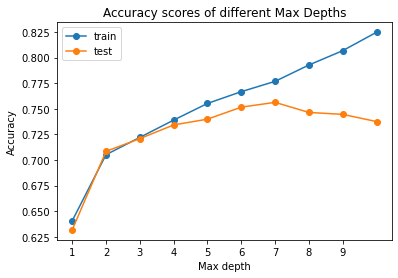

In [64]:
# Visualize
plt.figure()
plt.plot(max_depths, train_scores, label='train', marker='o')
plt.plot(max_depths, test_scores, label='test', marker='o')
plt.xticks(np.arange(9)+1)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy scores of different Max Depths')
plt.show()

We will go with math_depth of 7 - 7 tree branches as it is the max_depth with the highest accuracy score.

In [65]:
# Instantiate
my_tree = DecisionTreeClassifier(max_depth=7)

    # Fit
my_tree.fit(X_train, y_train)

    # Score
print(my_tree.score(X_train, y_train))
print(my_tree.score(X_test, y_test))

0.776840131270511
0.7560346847902507


For the tree decision model, The accuracy score on the test set is 0.76 or 76%.
We have performed a decision tree classifier. We did not use scaling or PCA, we only adjust our max_depth hyperparameter. We received a test accuracy of 76%.

### 3.2 Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

Let's separate our train set into a train set and a validation set. As before, we will use a 70% - 30% split meaning our train set would be 70% of the original train set, and a validation set would be 30% of the original test set.
We did assign our X_train, y_train, X_test, and y_test variables already (several times), so we will go ahead and perform a test x and y splits using a train_test_split method.
As before, we will split test x and y variables into new test x and y, and validation x and y.

In [90]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_train, y_train, train_size=0.7,test_size=0.3, random_state=1)

We will go through the same process of optimization again:
We will loop through different max_depths and see where is the best accuracy score. 
We will plot train and validation testes accuracies scores and pick the best max_depth from the graph.

In [91]:
max_depths = np.arange(10)+1

train_scores = list()
validation_scores = list()

# Explore values of tree depth
for max_depth in max_depths:

    # Instantiate
    my_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit
    my_tree.fit(X_train1, y_train1)

    # Score
    train_scores.append(my_tree.score(X_train1, y_train1))
    validation_scores.append(my_tree.score(X_valid1, y_valid1))

In [92]:
print(my_tree.score(X_train1, y_train1))
print(my_tree.score(X_valid1, y_valid1))

0.8372404554588078
0.7260416666666667


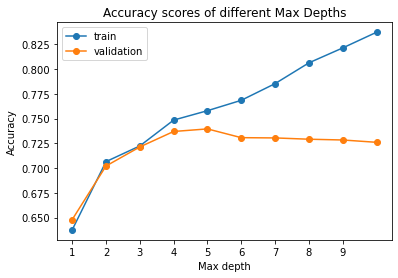

In [93]:
# Visualize
plt.figure()
plt.plot(max_depths, train_scores, label='train', marker='o')
plt.plot(max_depths, validation_scores, label='validation', marker='o')
plt.xticks(np.arange(9)+1)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Accuracy scores of different Max Depths')
plt.legend()
plt.show()

We will go with max_depth equal 4 as the accuracy score is the highest at 4. After 4 splits there is apparent overfitting.

Next, we will test the model with the test set.

In [94]:
# Instantiate
my_tree = DecisionTreeClassifier(max_depth=4)

# Fit
my_tree.fit(X_train1, y_train1)

# Score
train_scores.append(my_tree.score(X_train1, y_train1))
test_scores.append(my_tree.score(X_test, y_test))

In [95]:
print(my_tree.score(X_train1, y_train1))
print(my_tree.score(X_test, y_test))

0.7484929671801741
0.7372861495195688


The optimal value for the maximum depth of the decision tree model is 4, and the test accuracy score is 73.7 %.

We performed training of the model with a train only firstly and validation and train sets secondly. We did reduce the number of decision tree branches (from 7 to 4). However, the model performance - the test accuracy score, is about the same 
as when we did a model training with just a train set test (without validations sets) compare with when we utilized a validation test to optimize our hyperparameter max_depth.

### 3.3 Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

Let's see what advantages and disadvantages KNN and the Decision tree models have. We will create a table for better visualization.

In [96]:
d1 = {'': ['Advantage 1', 'Advantage 2', 'Disadvantage 1',  'Disadventage 2'], 
          'KNN': ['Few parameters to tune: distance metric and k.', 'No Training Period', 'VERY computationally expensive model', 'Requires normalization'], 
          'DT': ['Does not require normalization', 'Very easy to explain ', 'Unstable', 'Tend to overfit EASILY']}
                                                         
df1 = pd.DataFrame(data=d1)
df1

KNN  \
0     Advantage 1  Few parameters to tune: distance metric and k.   
1     Advantage 2                              No Training Period   
2  Disadvantage 1            VERY computationally expensive model   
3  Disadventage 2                          Requires normalization   

                               DT  
0  Does not require normalization  
1           Very easy to explain   
2                        Unstable  
3          Tend to overfit EASILY

   The two advantages of decision trees over KNNN is decision tree models do not require scaling data as opposed to KNN 
where scaling is detrimental for the algorithm to work, and decision trees models are very easy to explain to the audience wheres KNN models can be more difficult to explain as after performing PCA and scaling we no longer know what features are,
and how the prediction depends on features.
    The major two weaknesses of decision trees are decision trees models overfit very easily (almost always), and decision trees are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree. Overfitting is a major problem, as the model learns random noise in observations, remembers it, and as a 
the result makes poor predictions on unseen data.
    To conclude, when using decision tree models, we do not want to scale our data and have to watch for overfitting by optimizing a maximum 
depth parameter to the model.

## 4.  What is the purpose of the validation set, i.e., how is it different than the test set?

A validation data set is a set of data that is separated from the train and test sets, and is used to optimize models' hyperparameters. The purpose of the validation set is to help the model to find the best hyperparameter value for the best accuracy score possible by checking different hyperparameters applied to the test set and accuracy scores for each model with a particular hyperparameter. The validation set is a sort of a test set (but not the actual test set put aside for model testing) which is used by the model usually several times to test its hyperparameters. 
A test data set, on the other hand, is never used for any optimization purposes, but only to test the model performance. The test set has never seen the data a model has been trained on and is considered 100% unbiased. 

## 5. Re-run a decision tree or logistic regression on the data again:

### 5.1 Perform a 5-fold cross validation to optimize the hyperparameters of your model.

We will run a logistic regression model. 
We will perform 5-fold cross-validation to optimize the c hyperparameter. Having 5 validation folds means, we will go through 5 steps cycle where we will try to optimize c, check a validation score of the model with that c, repeat these steps 5 times, and finally find the optimal c to use in our model. We will check the model performance using a test set.
We will use our Standard Scaled and PCA-ed X_train to improve our model performance. The test set will also be scaled and analyzed for principal components. We will use our previous 100 dimensions.
Thus, our X and y for the train set are  X_train_ss_pca and y_train;
our X and y for the test set are X_test_ss_pca and y_train.
The cross-validation process will be happening in the train set.

In [97]:
# repesting scaled just to make sure we have a scaled data.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [98]:
my_PCA = PCA(n_components=100)

X_train_ss_pca = my_PCA.fit_transform(X_train_ss)
X_test_ss_pca = my_PCA.transform(X_test_ss)

print(X_train_pca.shape)
print(X_test_pca.shape)

(12798, 100)
(4267, 100)


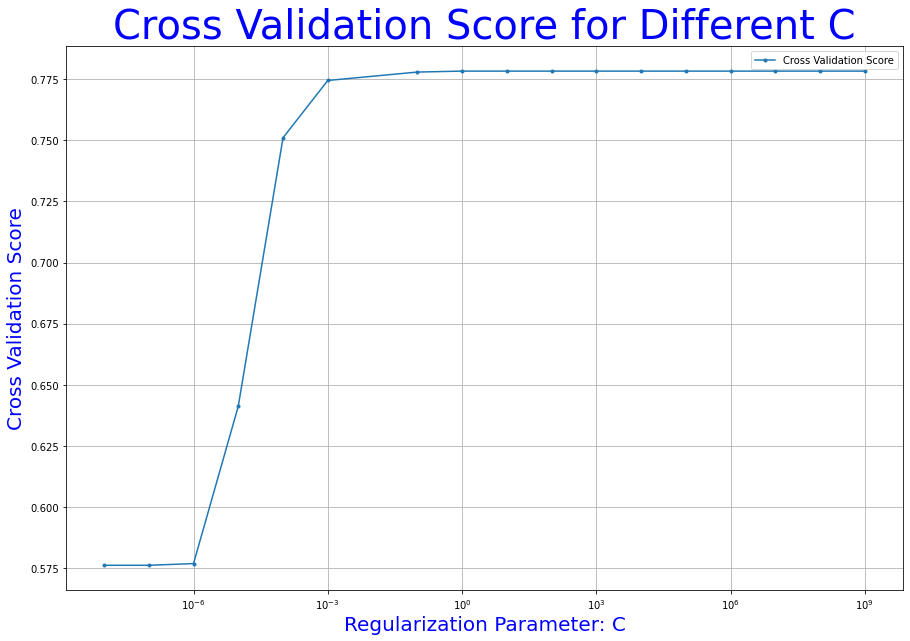

In [99]:
#Store the results
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    scores = cross_val_score(LR_model, X_train_ss_pca, y_train, cv = 5) # fits the model 5-times and scores on val.
    mean_score = np.mean(scores)
    
    cross_validation_scores.append(mean_score)

plt.figure(figsize=(15, 10))
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C', color='b', size=20)
plt.ylabel('Cross Validation Score', color='b', size=20)
plt.title('Cross Validation Score for Different C',color='b', size=40 )
plt.grid()
plt.show();

The highest cross-validation score is 77.5%, and $c=10^-3$. However, at this score, we see that overfitting is happening already. So, to prevent overfitting, we will take a slightly less validation score of $𝐶  = 10^-4$.

Because we've taken into consideration 5 different splits of the data, we can be more confident that the model with this hyperparameter value is the one that fits our data the best.

In [100]:
# Instantiate the model, increase max_iter to 1000 
logreg = LogisticRegression(C=0.0001, max_iter=1000)

    # Fit the model 
logreg.fit(X_train_ss_pca, y_train)

logreg.score(X_test_ss_pca, y_test)

0.7651745957347083

We optimized a hyperparameter C so C=0.0001. We used a 5-fold cross-validation technique to find the best C. we performed a Linear Regression Model with an optimized C parameter and got an accuracy score of 76.4%.

### 5.2  What does your confusion matrix look like for your best model on the test set?

Let's check test accuracy scores for different classification models: Logistic Regression, KNN, and Decision Tree.

In [121]:
# creating a data frame to help us to summarize our results.
d = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree'], 'Model Accuracy, %': [76.5, 73.8, 73.7]}
df = pd.DataFrame(data=d)
df

Model  Model Accuracy, %
0  Logistic Regression               76.5
1                  KNN               73.8
2        Decision Tree               73.7

We can see that the best-performing model in our case is Logistic Regression. The Decision Tree and KNN models both have lower test accuracy scores. So, I will go with the Logistic Regression as the best model for our case. We can state that the Logistic Rgeregression model is running less time than KNN which has the second high accuracy score.

We will see what a confusion matrix for the Decion Tree is. 

In [124]:
# create the confusion matrix

y_pred = logreg.predict(X_test_ss_pca)

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[1207,  602],
       [ 479, 1979]], dtype=int64)

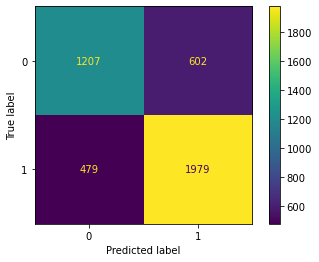

In [125]:
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

We can try to make a better plot of our confusion matrix using a heat map.

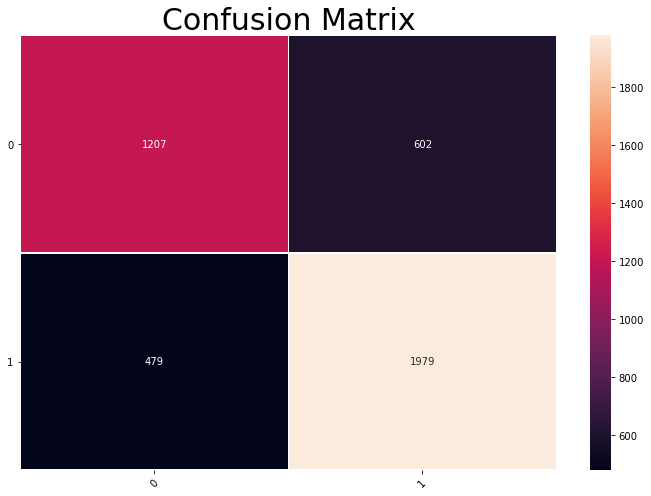

In [126]:
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Confusion Matrix', size =30)
plt.show()

Let's interpret these numbers (true negative - TN, false positive - FP, false negative - FN, true positive - TP):
* **TN**: There were 1,207 ratings 0 that we correctly classified as ratings of  0
* **FP**: There were 602 ratings 1 that we incorrectly classified as ratings of 0
* **FN**: There were 479 ratings 0 that we incorrectly classified as ratings of 1
* **TP**: There were 1,979 ratings 1 that we correctly classified as ratings of  1


Let's also print a classification report where we can see a summary of different scores for our model.

In [127]:
# printing classification report
cl_report = classification_report(y_test, y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1809
           1       0.77      0.81      0.79      2458

    accuracy                           0.75      4267
   macro avg       0.74      0.74      0.74      4267
weighted avg       0.75      0.75      0.75      4267



There are 3 scores in the classification report: precision, recall, and f1-score. 
Here, precision measures what proportion of a model assigned to a positive class are belonging to the positive class, and recall measures how many members of the positive class are correctly identified out of the total. F-1 score represents the harmonic average of the precision and recall scores. An F1 score is the best at 1 and worst at 0.

## 6. Create one new feature of your choice:

### 6.1 Explain your new feature and why you consider it will improve accuracy.

I will add a new feature called '% of Individual Reviews in the Total Reviews'. This is the percentage of 'number of reviews the reviewer has given' of the 'total number of reviews'. This is a new column ("feature") in our original data set. Note: I have to add a new feature to both train and test data sets.
This feature is important to understand the percentage of individuals in the total percentage of people reviewing the particular hotel. It will show how many percents of  total reviews come from a single person.

In [108]:
#creating a copy of the original train data
df_train_new_column = df_train.copy()

In [109]:
#adding a new feature to train data
df_train_new_column['% _of_Individual_Reviews_of_Total_Reviews'] = (df_train_new_column['Total_Number_of_Reviews_Reviewer_Has_Given']/df_train_new_column['Total_Number_of_Reviews'])*100

In [110]:
#creating a copy of the original test data
df_test_new_column = df_test.copy()

In [112]:
#adding a new feature to test data
df_test_new_column['% _of_Individual_Reviews_of_Total_Reviews'] =(df_test_new_column['Total_Number_of_Reviews_Reviewer_Has_Given']/df_test_new_column['Total_Number_of_Reviews'])*100

In [113]:
#checking new train data
df_train_new_column

Additional_Number_of_Scoring  Average_Score  \
0                               620            9.0   
1                              1258            9.4   
2                               995            8.1   
3                               853            8.4   
4                              1243            8.1   
...                             ...            ...   
12793                            68            7.8   
12794                          1172            7.8   
12795                           562            8.5   
12796                           154            8.0   
12797                           390            7.8   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     1974   
1                                      6                     4204   
2                                      2                     3826   
3                                      7                     2726   
4                                     11                     6608   
...                                  ...                      ...   
12793                                  2                      264   
12794                                 10                     5945   
12795                                  0                     1944   
12796                                 13                      768   
12797                                  7                     1717   

       Review_Total_Positive_Word_Counts  \
0                                    164   
1                                      4   
2                                     38   
3                                     10   
4                                      8   
...                                  ...   
12793                                 20   
12794                                  8   
12795                                 26   
12796                                  6   
12797                                  9   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                               1                562   
1                                               5                276   
2                                               1                129   
3                                              10                164   
4                                              69                639   
...                                           ...                ...   
12793                                           2                185   
12794                                          16                627   
12795                                           5                702   
12796                                           2                 24   
12797                                           2                526   

             lat       lng  weekday_of_review  ...  n_worth  n_would  n_write  \
0      51.506558 -0.004514                  1  ...        0        0        0   
1      51.502435 -0.000250                  0  ...        0        0        0   
2      51.504348 -0.033444                  0  ...        0        0        0   
3      51.507377  0.038657                  0  ...        0        0        0   
4      51.513556 -0.180002                  1  ...        0        0        0   
...          ...       ...                ...  ...      ...      ...      ...   
12793  51.522087 -0.108244                  0  ...        0        0        0   
12794  51.499981 -0.192879                  6  ...        0        0        0   
12795  51.492418 -0.278470                  1  ...        0        0        0   
12796  51.512676 -0.186783                  0  ...        0        0        0   
12797  51.492627 -0.228860                  2  ...        0        0        0   

       n_wrong  n_year  n_yes  n_yet  n_young  rating  \
0            0       0      0      0        0       1   
1            0       0      0      0        0   

In [114]:
#checking new test data
df_test_new_column

Additional_Number_of_Scoring  Average_Score  \
0                             1005            8.3   
1                              487            8.8   
2                              570            9.3   
3                             2623            8.7   
4                              365            8.1   
...                            ...            ...   
4262                           335            8.5   
4263                           406            8.2   
4264                           581            8.4   
4265                           620            9.0   
4266                           744            8.3   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     0                     3469   
1                                    46                     1805   
2                                     0                     2319   
3                                    19                    12158   
4                                    13                     1567   
...                                 ...                      ...   
4262                                  0                      944   
4263                                 72                     2011   
4264                                 16                     1994   
4265                                 58                     1974   
4266                                  7                     2474   

      Review_Total_Positive_Word_Counts  \
0                                     6   
1                                   121   
2                                     9   
3                                     0   
4                                     0   
...                                 ...   
4262                                  7   
4263                                  0   
4264                                 12   
4265                                 24   
4266                                  8   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              2                297   
1                                              1                  4   
2                                              1                590   
3                                              2                269   
4                                              2                373   
...                                          ...                ...   
4262                                           1                269   
4263                                           9                324   
4264                                           1                496   
4265                                          11                131   
4266                                           2                548   

            lat       lng  weekday_of_review  ...  n_n_worth  n_n_would  \
0     51.559096 -0.284704                  0  ...          0          0   
1     51.474469 -0.019428                  6  ...          0          0   
2     51.505696 -0.101525                  1  ...          0          0   
3     51.500961 -0.116591                  0  ...          0          0   
4     51.515125 -0.160066                  1  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
4262  51.540394 -0.369758                  0  ...          0          0   
4263  51.517972 -0.128049                  1  ...          0          0   
4264  51.507894 -0.143671                  4  ...          0          0   
4265  51.506558 -0.004514                  5  ...          0          0   
4266  51.529142 -0.137278                  1  ...          0          0   

      n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  n_n_young  rating  \
0             0          0         0        0        0          0       0   
1             0          0         0        0        0          0       1   
2             0          0         0        0     

We successfully added a new feature to our test and train data sets.

### 6.2 Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

We will run a logistic regression model on our modified data set. We will perform a 5-fold cross-validation to optimize the c hyperparameter.

We will assign our X and y value to the train set.

In [115]:
# Assigning our features to X 
X_train_new_column = df_train_new_column.drop(['rating'], axis=1)

# Assigning our target to y 
y_train_new_column = df_train_new_column['rating']

# Check 
display(X_train_new_column)
print(y_train_new_column)

Additional_Number_of_Scoring  Average_Score  \
0                               620            9.0   
1                              1258            9.4   
2                               995            8.1   
3                               853            8.4   
4                              1243            8.1   
...                             ...            ...   
12793                            68            7.8   
12794                          1172            7.8   
12795                           562            8.5   
12796                           154            8.0   
12797                           390            7.8   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     1974   
1                                      6                     4204   
2                                      2                     3826   
3                                      7                     2726   
4                                     11                     6608   
...                                  ...                      ...   
12793                                  2                      264   
12794                                 10                     5945   
12795                                  0                     1944   
12796                                 13                      768   
12797                                  7                     1717   

       Review_Total_Positive_Word_Counts  \
0                                    164   
1                                      4   
2                                     38   
3                                     10   
4                                      8   
...                                  ...   
12793                                 20   
12794                                  8   
12795                                 26   
12796                                  6   
12797                                  9   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                               1                562   
1                                               5                276   
2                                               1                129   
3                                              10                164   
4                                              69                639   
...                                           ...                ...   
12793                                           2                185   
12794                                          16                627   
12795                                           5                702   
12796                                           2                 24   
12797                                           2                526   

             lat       lng  weekday_of_review  ...  n_worry  n_worth  n_would  \
0      51.506558 -0.004514                  1  ...        0        0        0   
1      51.502435 -0.000250                  0  ...        0        0        0   
2      51.504348 -0.033444                  0  ...        0        0        0   
3      51.507377  0.038657                  0  ...        0        0        0   
4      51.513556 -0.180002                  1  ...        0        0        0   
...          ...       ...                ...  ...      ...      ...      ...   
12793  51.522087 -0.108244                  0  ...        0        0        0   
12794  51.499981 -0.192879                  6  ...        0        0        0   
12795  51.492418 -0.278470                  1  ...        0        0        0   
12796  51.512676 -0.186783                  0  ...        0        0        0   
12797  51.492627 -0.228860                  2  ...        0        0        0   

       n_write  n_wrong  n_year  n_yes  n_yet  n_young  \
0            0        0       0      0      0        0   
1            0        0       0      0      0 

0        1
1        1
2        1
3        0
4        0
        ..
12793    0
12794    0
12795    1
12796    0
12797    1
Name: rating, Length: 12798, dtype: int64


We will assign our X and y value to the test set.

In [116]:
# Assigning our features to X 
X_test_new_column = df_test_new_column.drop(['rating'], axis=1)

# Assigning our target to y 
y_test_new_column = df_test_new_column['rating']

# Check 
display(X_test_new_column)
print(y_test_new_column)

Additional_Number_of_Scoring  Average_Score  \
0                             1005            8.3   
1                              487            8.8   
2                              570            9.3   
3                             2623            8.7   
4                              365            8.1   
...                            ...            ...   
4262                           335            8.5   
4263                           406            8.2   
4264                           581            8.4   
4265                           620            9.0   
4266                           744            8.3   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     0                     3469   
1                                    46                     1805   
2                                     0                     2319   
3                                    19                    12158   
4                                    13                     1567   
...                                 ...                      ...   
4262                                  0                      944   
4263                                 72                     2011   
4264                                 16                     1994   
4265                                 58                     1974   
4266                                  7                     2474   

      Review_Total_Positive_Word_Counts  \
0                                     6   
1                                   121   
2                                     9   
3                                     0   
4                                     0   
...                                 ...   
4262                                  7   
4263                                  0   
4264                                 12   
4265                                 24   
4266                                  8   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                              2                297   
1                                              1                  4   
2                                              1                590   
3                                              2                269   
4                                              2                373   
...                                          ...                ...   
4262                                           1                269   
4263                                           9                324   
4264                                           1                496   
4265                                          11                131   
4266                                           2                548   

            lat       lng  weekday_of_review  ...  n_n_worry  n_n_worth  \
0     51.559096 -0.284704                  0  ...          0          0   
1     51.474469 -0.019428                  6  ...          0          0   
2     51.505696 -0.101525                  1  ...          0          0   
3     51.500961 -0.116591                  0  ...          0          0   
4     51.515125 -0.160066                  1  ...          0          0   
...         ...       ...                ...  ...        ...        ...   
4262  51.540394 -0.369758                  0  ...          0          0   
4263  51.517972 -0.128049                  1  ...          0          0   
4264  51.507894 -0.143671                  4  ...          0          0   
4265  51.506558 -0.004514                  5  ...          0          0   
4266  51.529142 -0.137278                  1  ...          0          0   

      n_n_would  n_n_write  n_n_wrong  n_n_year  n_n_yes  n_n_yet  n_n_young  \
0             0          0          0         0        0        0          0   
1             0          0          0         0        0        0          0   
2             0          0          0    

0       0
1       1
2       1
3       0
4       0
       ..
4262    1
4263    0
4264    1
4265    0
4266    1
Name: rating, Length: 4267, dtype: int64


We have to scale our data and perform PCA as well. Let's use a Standard Scale again. We will scale first and then perform a principal component analysis.

Scaling.
We will use Standard Scaler again. We will fit our X_train_new_column, and then transform X_train_new_column and X_test_new_column.

In [117]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler
SS.fit(X_train_new_column)

# Transform the training and test sets 
X_train_new_column_ss = SS.transform(X_train_new_column)
X_test_new_column_ss = SS.transform(X_test_new_column)

PCA. We will go with 100 features again. We will fit our X_train_new_column_ss, and then transform our X_train_new_column_ss and X_test_new_column_ss.


In [118]:
my_PCA = PCA(n_components=100)

X_train_new_column_ss_pca = my_PCA.fit_transform(X_train_new_column_ss)
X_test_new_column_ss_pca = my_PCA.transform(X_test_new_column_ss)


Now it is time to optimize a c hyperparameter using a 5 fold cross-validation. The validation process will be happening within our train set. We will choose the best c parameter where the accuracy score is the highest.

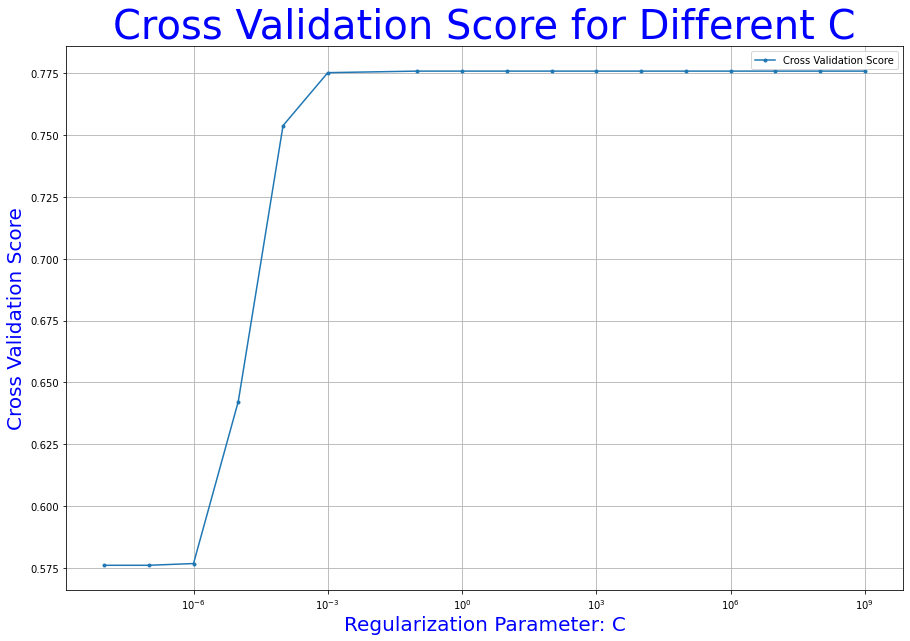

In [119]:
#Store the results
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    scores = cross_val_score(LR_model, X_train_new_column_ss_pca, y_train_new_column, cv = 5) # fits the model 5-times and scores on val.
    mean_score = np.mean(scores)
    
    cross_validation_scores.append(mean_score)

plt.figure(figsize=(15, 10))
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C', color='b', size=20)
plt.ylabel('Cross Validation Score', color='b', size=20)
plt.title('Cross Validation Score for Different C',color='b', size=40 )
plt.grid()
plt.show();

The highest validation score is for $C=10^-3$. However, $C=10^-3$, we see that overfitting starts. So, we will choose $C=10^-4$ and retrain a model for $C=0.0001.

In [120]:
# Instantiate the model, increase max_iter to 1000 
logreg = LogisticRegression(C=10, max_iter=0.0001)

# Fit the model 
logreg.fit(X_train_new_column_ss_pca, y_train_new_column)

#score the model
logreg.score(X_test_new_column_ss_pca, y_test_new_column)

0.7508788375908132

The accuracy score for this model is 0.75 or 75 %. There is a slight decrease in the accuracy (from 76.5% to 75%). We can conclude that a new feature doesn't add some value to the model prediction.

Thus, we added a new feature to our original data set. This feature identifies a percentage of total reviews that come from a single person. We scaled modified data sets (a train set and a test set), performed principal component analysis applying 100 features to our train and test sets (thus reducing features from 2,744 to 100 features), used a 5 fold cross-validation to find the optimized c parameter, and finally ran a logistic regression model. The test accuracy score for this model is 75%. There is a decrease in the test accuracy score compare to the original data. We can see that adding a new feature doesn't improve our model performance, only adds more colinearity to the model.

## Conclusion

In this analytical report, we performed several classifier models to try to predict the rating score in the Hotel Reviews Data. We used Logistic Regression, KNN, and Decision Tree algorithms and observed how test accuracies scores changes from one algorithm to another. In our case, the best model was the Decision Tree model.

We scaled our data in all models except a Decision Tree which doesn't require scaling. We also used a principal component analysis (PCA) to decrease the model's number of features. We concluded that applying PCA reduces the model's time significantly, but we probably lose some information while performing PCA.

We tried to optimize models' hyperparameters to increase models' performance. In some cases for optimization, we used just a train set, in some cases we divided a train set into a train set and a validation sets, and finally, in some cases, we used a cross-validation method. We concluded that using a validation set is always a good idea to prevent data leakage into our test set.

We observed how models' running time varies from one algorithm to another. The learning point was that KNN models run for much longer times than other models. Also, we concluded how scaling and PCAs are crucial in KNN models.
Finally, we observed how adding a new feature derived from the original data set doesn't add new valuable information to our models, and there is a  decrease in a model accuracy score.

We checked our best model's confusion matrix and a classification report and were able to derive important information from them. We checked our true negative, true positive, false negative, and false-positive numbers and interpreted what these numbers mean in our model. We can use confusion matrices and classification reports to evaluate different models.

Overall, different classifying models can be used for different problems, and we can try several of them to check which model is the most suitable in each particular case.